# MDCM - Team Sports Analytics Society 2

Members: Peter Majors, Matthew Reese, Adrian Crisostomo, Paul Gomes

# Import Data And Packages

In [345]:
#Import Packages
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('ggplot')

import seaborn as sns

from math import sin, cos, sqrt, atan2, radians
import numpy as np
import pandas as pd
import random

In [346]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import xgboost as xgb

from sklearn.metrics import (auc, classification_report, roc_auc_score, accuracy_score,
                             f1_score, log_loss, roc_curve, confusion_matrix,
                             precision_score, recall_score, plot_confusion_matrix,
                             make_scorer)


import statsmodels.formula.api as smf

np.random.seed(0)

In [347]:
#Import Given Test Dataset
df = pd.read_csv('C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/NCAA_Tourney_2002_2021.csv')

In [348]:
#Show All Columns of Test Dataframe
pd.set_option("display.max_columns", None)
df.head(3)

,team1_id,team1_score,team2_id,team2_score,WLoc,num_ot,team1_position,team2_position,team1_seed,team2_seed,strongseed,weakseed,team1_region,team2_region,slot,team1_teamname,team2_teamname,season,host,host_lat,host_long,team1_lat,team1_long,team2_lat,team2_long,team1_coach_id,team1_pt_school_ncaa,team1_pt_overall_ncaa,team1_pt_school_s16,team1_pt_overall_s16,team1_pt_school_ff,team1_pt_overall_ff,team1_pt_career_school_wins,team1_pt_career_school_losses,team1_pt_career_overall_wins,team1_pt_career_overall_losses,team1_pt_team_season_wins,team1_pt_team_season_losses,team1_pt_coach_season_wins,team1_pt_coach_season_losses,team2_coach_id,team2_pt_school_ncaa,team2_pt_overall_ncaa,team2_pt_school_s16,team2_pt_overall_s16,team2_pt_school_ff,team2_pt_overall_ff,team2_pt_career_school_wins,team2_pt_career_school_losses,team2_pt_career_overall_wins,team2_pt_career_overall_losses,team2_pt_team_season_wins,team2_pt_team_season_losses,team2_pt_coach_season_wins,team2_pt_coach_season_losses,team1_ap_final,team1_ap_preseason,team1_coaches_before_final,team1_coaches_preseason,team2_ap_final,team2_ap_preseason,team2_coaches_before_final,team2_coaches_preseason,team1_fg2pct,team1_fg3pct,team1_ftpct,team1_blockpct,team1_oppfg2pct,team1_oppfg3pct,team1_oppftpct,team1_oppblockpct,team1_f3grate,team1_oppf3grate,team1_arate,team1_opparate,team1_stlrate,team1_oppstlrate,team2_fg2pct,team2_fg3pct,team2_ftpct,team2_blockpct,team2_oppfg2pct,team2_oppfg3pct,team2_oppftpct,team2_oppblockpct,team2_f3grate,team2_oppf3grate,team2_arate,team2_opparate,team2_stlrate,team2_oppstlrate,team1_tempo,team1_adjtempo,team1_oe,team1_adjoe,team1_de,team1_adjde,team2_tempo,team2_adjtempo,team2_oe,team2_adjoe,team2_de,team2_adjde,game_id,score_diff,seed_diff
0,1211,85,1425,66,N,0,X01,X06,1,6,1,6,X,X,R4X1,Gonzaga,USC,2021,indianapolis,39.761,-86.165,47.668144,-117.403062,34.021058,-118.283858,mark-few-1,20,20,9,9,1,1,625,124,625,124,26,0,26,0,andy-enfield-1,2,3,0,1,0,0,154,109,195,137,22,7,22,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.919414,36.538462,72.711864,7.108549,46.78194,32.481752,70.316302,6.868132,32.258065,34.487099,53.603604,44.812030,0.110360,0.079704,52.110250,34.790875,64.715190,13.624221,42.208370,34.150327,72.790698,7.062877,31.179609,35.273775,50.253807,52.855051,0.069789,0.079328,75.2784,74.7756,122.395,126.808,91.6576,88.7549,67.5611,67.2953,108.537,113.579,94.8746,89.9260,2021-1211-1425,19,-5
1,1211,83,1166,65,N,0,X01,X05,1,5,1,5,X,X,R3X1,Gonzaga,Creighton,2021,indianapolis,39.761,-86.165,47.668144,-117.403062,41.265325,-95.947029,mark-few-1,20,20,9,9,1,1,625,124,625,124,26,0,26,0,greg-mcdermott-1,5,8,0,0,0,0,251,124,400,255,20,8,20,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.919414,36.538462,72.711864,7.108549,46.78194,32.481752,70.316302,6.868132,32.258065,34.487099,53.603604,44.812030,0.110360,0.079704,56.270096,36.657682,64.222222,9.395973,46.021093,32.132132,70.615034,8.681672,44.298507,38.970158,55.708908,51.296830,0.100808,0.081461,75.2784,74.7756,122.395,126.808,91.6576,88.7549,69.5619,69.0682,109.643,115.567,97.5105,92.8330,2021-1211-1166,18,-4
2,1425,82,1332,78,N,0,X06,X07,6,7,6,7,X,X,R3X2,USC,Oregon,2021,indianapolis,39.761,-86.165,34.021058,-118.283858,44.044515,-123.073980,andy-enfield-1,2,3,0,1,0,0,154,109,195,137,22,7,22,7,dana-altman-1,6,14,4,4,1,1,279,109,689,352,20,6,20,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.110250,34.790875,64.715190,13.624221,42.20837,34.150327,72.790698,7.062877,31.179609,35.273775,50.253807,52.855051,0.069789,0.079328,52.872340,37.913043,70.443350,10.681818,50.000000,33.567663,76.335878,7.446809,37.953795,39.268461,48.811189,54.358162,0.109961,0.071418,67.5611,67.2953,108.537,113.579,94.8746,89.9260,67.8562,67.2410,109.767,115.149,99.8891,96.0406,2021-1425-1332,4,-1


# Beginning of PBP Research

In [108]:
#Import 'ncaahoopR' Datasets Containing All Play-By-Play Data From The 2019-20 NCAA College Basketball Season
pbp = pd.read_csv('C:/Users/Peter Majors/%ML_PATH%/datasets/MDCM 2022 PBP 2019/mdcm_pbp_2019.csv', encoding='latin-1')
pbp_1 = pd.read_csv('C:/Users/Peter Majors/%ML_PATH%/datasets/MDCM 2022 PBP 2019/mdcm_pbp_2019_1.csv', encoding='latin-1')

In [109]:
#Append The Two Play-By-Play Datasets and Remove Any Duplicates
pbp = pbp.append(pbp_1, ignore_index=True)
pbp = pbp.drop_duplicates()

In [110]:
#Export Dataframe 
pbp.to_csv('C:/Users/Peter Majors/%ML_PATH%/datasets/MDCM 2022 PBP 2019/mdcm_pbp_2019_final.csv', index=False)

In [111]:
#Show All Columns of PBP Dataframe 
pd.set_option("display.max_columns", None)
pbp.head(4)

,Unnamed: 0,game_id,date,home,away,play_id,half,time_remaining_half,secs_remaining,secs_remaining_absolute,description,home_score,away_score,score_diff,play_length,win_prob,naive_win_prob,home_time_out_remaining,away_time_out_remaining,home_favored_by,total_line,referees,arena_location,arena,capacity,attendance,shot_x,shot_y,shot_team,shot_outcome,shooter,assist,three_pt,free_throw,possession_before,possession_after,wrong_time
0,1,401171774,2019-11-10,Drexel,Abilene Christian,1,1,20:00,2400,2700,PLAY,0,0,0,0,0.633083,0.500000,4,4,3.4,NaN,"c(""Landon Brandes"", "" Steven Perry"", "" Jr."", ""...","Philadelphia, PA",Daskalakis Athletic Center,2509.0,795.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drexel,NaN
1,2,401171774,2019-11-10,Drexel,Abilene Christian,2,1,19:38,2378,2678,James Butler Turnover.,0,0,0,22,0.632803,0.500000,4,4,3.4,NaN,"c(""Landon Brandes"", "" Steven Perry"", "" Jr."", ""...","Philadelphia, PA",Daskalakis Athletic Center,2509.0,795.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drexel,Abilene Christian,False
2,3,401171774,2019-11-10,Drexel,Abilene Christian,3,1,19:19,2359,2659,Payten Ricks made Three Point Jumper. Assisted...,0,3,-3,19,0.567850,0.432881,4,4,3.4,NaN,"c(""Landon Brandes"", "" Steven Perry"", "" Jr."", ""...","Philadelphia, PA",Daskalakis Athletic Center,2509.0,795.0,NaN,NaN,Abilene Christian,made,Payten Ricks,Damien Daniels,True,False,Abilene Christian,Drexel,False
3,4,401171774,2019-11-10,Drexel,Abilene Christian,4,1,18:51,2331,2631,James Butler Turnover.,0,3,-3,28,0.566551,0.431979,4,4,3.4,NaN,"c(""Landon Brandes"", "" Steven Perry"", "" Jr."", ""...","Philadelphia, PA",Daskalakis Athletic Center,2509.0,795.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drexel,Abilene Christian,False


# Exploratory Data Analysis - All Shooting

In [11]:
#Create Dataframe Of Plays Where Shots Were Attempted
pbp_shots = pbp.loc[pbp.shot_outcome.notna()]

In [12]:
#Get Value Counts on All Shots
pbp_shots.shot_outcome.value_counts()

made      437459
missed    437216
Name: shot_outcome, dtype: int64

In [13]:
#Determine Mean Shooting Percentage By Number of Seconds Remaining In Games
pbp_shots['shot_outcome_binary'] = np.where(pbp_shots['shot_outcome'] == 'made', 1, 0)
pbp_shots_bysec = pbp_shots.groupby('secs_remaining')['shot_outcome_binary'].mean()
pbp_shots_bysec = pd.DataFrame(data = pbp_shots_bysec)
pbp_shots_bysec

C:\Users\PETERM~1\AppData\Local\Temp/ipykernel_15624/621253120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbp_shots['shot_outcome_binary'] = np.where(pbp_shots['shot_outcome'] == 'made', 1, 0)


,shot_outcome_binary
secs_remaining,
0,0.376225
1,0.492726
2,0.553191
3,0.536320
4,0.526582
...,...
2396,0.666667
2397,0.428571
2398,0.600000


Text(0, 0.5, 'Shooting Percentage')

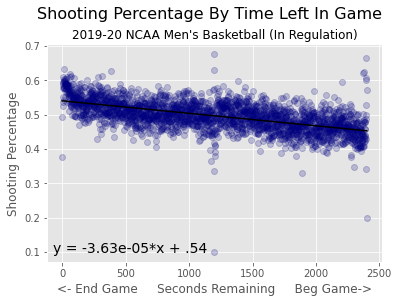

In [14]:
#Add Formula To The Plot
fig = plt.figure()
ax = fig.add_subplot()
ax.text(0.48, 0.03, 'y = -3.63e-05*x + .54',
       verticalalignment='bottom', horizontalalignment='right',
       transform=ax.transAxes, fontsize=14)

#Scatter Plot To Visualize The How Seconds Remianing Impacts Scoring
plt.plot(range(0,2401), pbp_shots_bysec, 'o', color = 'navy', alpha = 0.2)

#Add Linear Regression
x = range(0,2401)
m, b = np.polyfit(x, pbp_shots_bysec, 1)
plt.plot(x, m*x+b, color='black')

#Add labels
plt.suptitle('Shooting Percentage By Time Left In Game', size = 16, y= 1.01)
plt.title("2019-20 NCAA Men's Basketball (In Regulation)", size = 12)
plt.xlabel('<- End Game     Seconds Remaining     Beg Game->')
plt.ylabel('Shooting Percentage')

In [15]:
#Check Results of Lin Reg
sec_remain = [1,500,1000,1500,2000,2400]

for i in sec_remain:
    y = i*m + b
    print(y)

[0.54056172]
[0.52240368]
[0.50420924]
[0.4860148]
[0.46782036]
[0.45326482]


# Exploratory Data Analysis - 3PT%

In [16]:
#Reduce To Three Point Shots
pbp_threept_shots = pbp_shots.loc[pbp_shots['three_pt'] == True]
pbp_threept_shots['threept_shot_outcome_binary'] = np.where((pbp_threept_shots['shot_outcome_binary'] == 1), 1, 0)

C:\Users\PETERM~1\AppData\Local\Temp/ipykernel_15624/613623002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbp_threept_shots['threept_shot_outcome_binary'] = np.where((pbp_threept_shots['shot_outcome_binary'] == 1), 1, 0)


In [17]:
#Get Value Counts on 3PT% (33.6%)
pbp_threept_shots.threept_shot_outcome_binary.value_counts()

0    167567
1     83849
Name: threept_shot_outcome_binary, dtype: int64

In [18]:
#Group 3P Shot Attempts By Seconds Remaining In The Game
pbp_threept_shots_bysec = pbp_threept_shots.groupby('secs_remaining')['shot_outcome_binary'].mean()
pbp_threept_shots_bysec = pd.DataFrame(data = pbp_threept_shots_bysec)
pbp_threept_shots_bysec

,shot_outcome_binary
secs_remaining,
0,0.190709
1,0.205634
2,0.269841
3,0.233202
4,0.216590
...,...
2394,0.333333
2395,0.222222
2396,0.750000


Text(0, 0.5, 'Shooting Percentage')

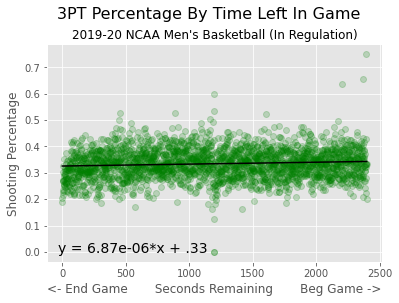

In [19]:
#Add Formula To The Plot
fig = plt.figure()
ax = fig.add_subplot()
ax.text(0.48, 0.03, 'y = 6.87e-06*x + .33',
       verticalalignment='bottom', horizontalalignment='right',
       transform=ax.transAxes, fontsize=14)

#Scatter Plot To Visualize The How Seconds Remianing Impacts 3PT%
plt.plot(range(0,2399), pbp_threept_shots_bysec, 'o', color = 'green', alpha = 0.2)

#Add Linear Regression
x = range(0,2399)
m, b = np.polyfit(x, pbp_threept_shots_bysec, 1)
plt.plot(x, m*x+b, color='black')

#Add Labels
plt.suptitle('3PT Percentage By Time Left In Game', size = 16, y= 1.01)
plt.title("2019-20 NCAA Men's Basketball (In Regulation)", size = 12)
plt.xlabel('<- End Game       Seconds Remaining       Beg Game ->')
plt.ylabel('Shooting Percentage')

In [20]:
#Check Results of Lin Reg
sec_remain = [1,500,1000,1500,2000,2400]

for i in sec_remain:
    y = i*m + b
    print(y)

[0.32588422]
[0.32949685]
[0.33311672]
[0.33673658]
[0.34035645]
[0.34325234]


# Exploratory Data Analysis - 2PT%

In [21]:
#Reduce To Two Point Shots
pbp_twopt_shots = pbp_shots.loc[pbp_shots['three_pt'] == False]
pbp_twopt_shots['twopt_shot_outcome_binary'] = np.where((pbp_twopt_shots['shot_outcome_binary'] == 1), 1, 0)

C:\Users\PETERM~1\AppData\Local\Temp/ipykernel_15624/2504333607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbp_twopt_shots['twopt_shot_outcome_binary'] = np.where((pbp_twopt_shots['shot_outcome_binary'] == 1), 1, 0)


In [22]:
#Get Value Counts on 2p% (56.4%)
pbp_twopt_shots.twopt_shot_outcome_binary.value_counts()

1    336836
0    262990
Name: twopt_shot_outcome_binary, dtype: int64

In [23]:
#Group 2P Shot Attempts By Seconds Remaining In The Game
pbp_twopt_shots_bysec = pbp_twopt_shots.groupby('secs_remaining')['shot_outcome_binary'].mean()
pbp_twopt_shots_bysec = pd.DataFrame(data = pbp_twopt_shots_bysec)
pbp_twopt_shots_bysec

,shot_outcome_binary
secs_remaining,
0,0.562654
1,0.636651
2,0.673835
3,0.666667
4,0.641405
...,...
2395,0.666667
2396,0.647059
2397,0.454545


Text(0, 0.5, 'Shooting Percentage')

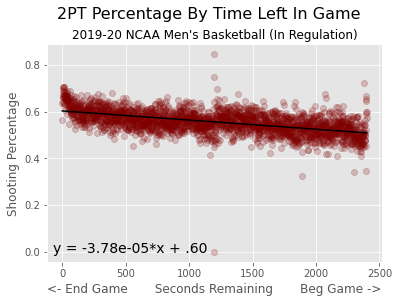

In [24]:
#Add Formula To The Plot
fig = plt.figure()
ax = fig.add_subplot()
ax.text(0.48, 0.03, 'y = -3.78e-05*x + .60',
       verticalalignment='bottom', horizontalalignment='right',
       transform=ax.transAxes, fontsize=14)

#Scatter Plot To Visualize The How Seconds Remianing Impacts 2PT%
plt.plot(range(0,2400), pbp_twopt_shots_bysec, 'o', color = 'maroon', alpha = 0.2)

#Add Linear Regression
x = range(0,2400)
m, b = np.polyfit(x, pbp_twopt_shots_bysec, 1)
plt.plot(x, m*x+b, color='black')

#Add Labels
plt.suptitle('2PT Percentage By Time Left In Game', size = 16, y= 1.01)
plt.title("2019-20 NCAA Men's Basketball (In Regulation)", size = 12)
plt.xlabel('<- End Game       Seconds Remaining       Beg Game ->')
plt.ylabel('Shooting Percentage')

In [25]:
#Check Results of Lin Reg
sec_remain = [1,500,1000,1500,2000,2400]

for i in sec_remain:
    y = i*m + b
    print(y)

[0.60352499]
[0.58396372]
[0.56436324]
[0.54476277]
[0.52516229]
[0.50948191]


# Exploratory Data Analysis - Free Throw%

In [26]:
#Reduce To Free Throws
pbp_freethrow_shots = pbp_shots.loc[pbp_shots['free_throw'] == True]
pbp_freethrow_shots['freethrow_shot_outcome_binary'] = np.where((pbp_freethrow_shots['shot_outcome'] == 'made'), 1, 0)

C:\Users\PETERM~1\AppData\Local\Temp/ipykernel_15624/1070603302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbp_freethrow_shots['freethrow_shot_outcome_binary'] = np.where((pbp_freethrow_shots['shot_outcome'] == 'made'), 1, 0)


In [27]:
#Get Value Counts on Free Throws (70.6%)
pbp_freethrow_shots.freethrow_shot_outcome_binary.value_counts()

1    150221
0     62292
Name: freethrow_shot_outcome_binary, dtype: int64

In [28]:
#Group 2P Shot Attempts By Seconds Remaining In The Game
pbp_freethrow_bysec = pbp_freethrow_shots.groupby('secs_remaining')['shot_outcome_binary'].mean()
pbp_freethrow_bysec = pd.DataFrame(data = pbp_freethrow_bysec)
pbp_freethrow_bysec

,shot_outcome_binary
secs_remaining,
0,0.644295
1,0.722353
2,0.741117
3,0.738292
4,0.697500
...,...
2393,1.000000
2394,0.000000
2395,1.000000


In [29]:
print(m)

[-3.92009487e-05]


Text(0, 0.5, 'Free Throw Percentage')

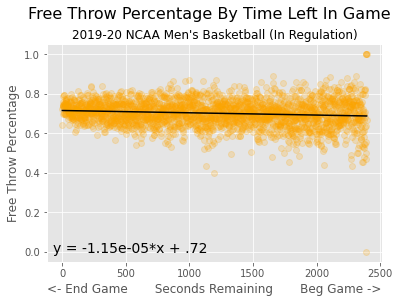

In [30]:
#Add Formula To The Plot
fig = plt.figure()
ax = fig.add_subplot()
ax.text(0.48, 0.03, 'y = -1.15e-05*x + .72',
       verticalalignment='bottom', horizontalalignment='right',
       transform=ax.transAxes, fontsize=14)

#Scatter Plot To Visualize The How Seconds Remianing Impacts FT%
plt.plot(range(0,2395), pbp_freethrow_bysec, 'o', color = 'orange', alpha = 0.2)

#Add Linear Regression
x = range(0,2395)
m, b = np.polyfit(x, pbp_freethrow_bysec, 1)
plt.plot(x, m*x+b, color='black')

#Add Labels
plt.suptitle('Free Throw Percentage By Time Left In Game', size = 16, y= 1.01)
plt.title("2019-20 NCAA Men's Basketball (In Regulation)", size = 12)
plt.xlabel('<- End Game       Seconds Remaining       Beg Game ->')
plt.ylabel('Free Throw Percentage')

In [31]:
#Check Results of Lin Reg
sec_remain = [1,500,1000,1500,2000,2400]

for i in sec_remain:
    y = i*m + b
    print(y)

[0.71536654]
[0.70960802]
[0.70383796]
[0.6980679]
[0.69229784]
[0.68768179]


# Exploratory Data Analysis - Shot Type Progression at Fordham

In [32]:
#Create Bins For Each Minute Remaining In Games
pbp_twopt_shots['secs_remaining_bin'] = pd.cut(pbp_twopt_shots['secs_remaining'], 20)

C:\Users\PETERM~1\AppData\Local\Temp/ipykernel_15624/2731915549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbp_twopt_shots['secs_remaining_bin'] = pd.cut(pbp_twopt_shots['secs_remaining'], 20)


In [33]:
#Find Shooting Percentage On 2P Shots By Team By Minute
pbp_twopt_shots_byteam = pd.DataFrame(pbp_twopt_shots.groupby(['shot_team','secs_remaining_bin'])['twopt_shot_outcome_binary'].mean())
pbp_twopt_shots_byteam

twopt_shot_outcome_binary
shot_team         secs_remaining_bin                           
Abilene Christian (-2.4, 120.0]                        0.721154
                  (120.0, 240.0]                       0.576923
                  (240.0, 360.0]                       0.637500
                  (360.0, 480.0]                       0.628205
                  (480.0, 600.0]                       0.500000
...                                                         ...
Youngstown State  (1800.0, 1920.0]                     0.575342
                  (1920.0, 2040.0]                     0.525641
                  (2040.0, 2160.0]                     0.500000
                  (2160.0, 2280.0]                     0.533333
                  (2280.0, 2400.0]                     0.459016

[12560 rows x 1 columns]

In [34]:
#Create 'shot_team' Column Based On Indicies
pbp_twopt_shots_byteam.reset_index(level=0, inplace=True)

In [35]:
pbp_twopt_shots_byteam.reset_index(level=0, inplace=True)

[Text(0, 0, '(-2.4, 120.0]'),
 Text(1, 0, '(120.0, 240.0]'),
 Text(2, 0, '(240.0, 360.0]'),
 Text(3, 0, '(360.0, 480.0]'),
 Text(4, 0, '(480.0, 600.0]'),
 Text(5, 0, '(600.0, 720.0]'),
 Text(6, 0, '(720.0, 840.0]'),
 Text(7, 0, '(840.0, 960.0]'),
 Text(8, 0, '(960.0, 1080.0]'),
 Text(9, 0, '(1080.0, 1200.0]'),
 Text(10, 0, '(1200.0, 1320.0]'),
 Text(11, 0, '(1320.0, 1440.0]'),
 Text(12, 0, '(1440.0, 1560.0]'),
 Text(13, 0, '(1560.0, 1680.0]'),
 Text(14, 0, '(1680.0, 1800.0]'),
 Text(15, 0, '(1800.0, 1920.0]'),
 Text(16, 0, '(1920.0, 2040.0]'),
 Text(17, 0, '(2040.0, 2160.0]'),
 Text(18, 0, '(2160.0, 2280.0]'),
 Text(19, 0, '(2280.0, 2400.0]')]

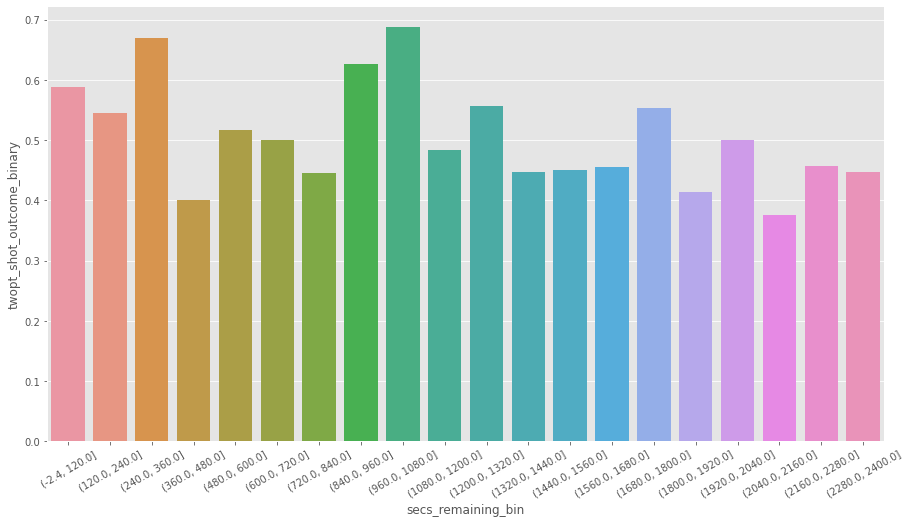

In [36]:
#Examine Fordham Basketball During The 2019 Season
pbp_twopt_shots_byteam_season_fordham = pbp_twopt_shots_byteam.loc[pbp_twopt_shots_byteam['shot_team'] == 'Fordham']

#Sample Barplot of Fordham in 2019-20
plt.figure(figsize = (15,8))
ax = sns.barplot(data = pbp_twopt_shots_byteam_season_fordham, x = "secs_remaining_bin", y = "twopt_shot_outcome_binary")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

# Exploratory Data Analysis - Shot Type Progression By Team

In [37]:
#Find Mean For Each Seconds Interval Across All Teams
pbp_twopt_shots_bysecs = pbp_twopt_shots_byteam.groupby('secs_remaining_bin')['twopt_shot_outcome_binary'].mean()
pbp_twopt_shots_bysecs = pd.DataFrame(pbp_twopt_shots_bysecs)
pbp_twopt_shots_bysecs.head(3)

,twopt_shot_outcome_binary
secs_remaining_bin,
"(-2.4, 120.0]",0.564746
"(120.0, 240.0]",0.551880
"(240.0, 360.0]",0.540144


In [38]:
#Find Mean For Each Team Across All Seconds Intervals
pbp_twopt_shots_byteams = pbp_twopt_shots_byteam.groupby('shot_team')['twopt_shot_outcome_binary'].mean().sort_values(ascending = False)
pbp_twopt_shots_byteams = pd.DataFrame(pbp_twopt_shots_byteams)
pbp_twopt_shots_byteams.head(3)

,twopt_shot_outcome_binary
shot_team,
Flagler,0.717500
Xavier LA,0.652909
Dayton,0.646228


In [39]:
#Left Join The Above Two Dataframes Onto The Complete Team by Second Interval Dataframe 'pbp_twopt_shots_byteam'
pbp_twopt_shots_byteam_merged = pd.merge(pbp_twopt_shots_byteam, pbp_twopt_shots_bysecs, on = 'secs_remaining_bin')
pbp_twopt_shots_byteam_merged = pd.merge(pbp_twopt_shots_byteam_merged, pbp_twopt_shots_byteams, on = 'shot_team')
pbp_twopt_shots_byteam_merged = pbp_twopt_shots_byteam_merged.rename(
                                    columns={"twopt_shot_outcome_binary_x": "twopt_shootingpct_teamsec", 
                                             "twopt_shot_outcome_binary_y": "twopt_shootingpct_leaguesec",
                                             "twopt_shot_outcome_binary": "twopt_shootingpct_teamall"})

In [40]:
#What Are The Best Teams Late In Games With Respect To Increasing Their Performances In Final 2, 4, and 6 Minutes?
pbp_twopt_shots_byteam_merged['twopt_shootingpct_overexp'] = pbp_twopt_shots_byteam_merged.apply(lambda row: row['twopt_shootingpct_teamsec'] - row['twopt_shootingpct_leaguesec'], axis=1)

pbp_twopt_shots_byteam_merged.sort_values(by = 'twopt_shootingpct_overexp', ascending = False).head(3)

,secs_remaining_bin,shot_team,twopt_shootingpct_teamsec,twopt_shootingpct_leaguesec,twopt_shootingpct_teamall,twopt_shootingpct_overexp
4439,"(2280.0, 2400.0]",Illinois-Springfield,1.0,0.462055,0.618421,0.537945
6559,"(2280.0, 2400.0]",Mount Marty,1.0,0.462055,0.630117,0.537945
10079,"(2280.0, 2400.0]",St. Mary's (TX),1.0,0.462055,0.617647,0.537945


In [41]:
#Create DataFrame of Counts Of Shots In Each Team & Seconds Remaining Combination
pbp_count_twopt_shots = pbp_twopt_shots.groupby(['shot_team', 'secs_remaining_bin']).count()
pbp_count_twopt_shots = pbp_count_twopt_shots['Unnamed: 0']
pbp_count_twopt_shots = pd.DataFrame(pbp_count_twopt_shots)
pbp_count_twopt_shots.head(3)

Unnamed: 0
shot_team         secs_remaining_bin            
Abilene Christian (-2.4, 120.0]              104
                  (120.0, 240.0]             104
                  (240.0, 360.0]              80

In [42]:
#Change The Indices (First)
pbp_count_twopt_shots.reset_index(level = 0, inplace = True)

In [43]:
#Change The Indices (Second)
pbp_count_twopt_shots.reset_index(level = 0, inplace = True)

In [44]:
#Rename Unnamed Column To Count
pbp_count_twopt_shots = pbp_count_twopt_shots.rename(columns={"Unnamed: 0":"count"})

In [45]:
#Create New Primary Key Column
pbp_count_twopt_shots['team_secs_remain'] = pbp_count_twopt_shots.apply(lambda row: str(row['secs_remaining_bin']) + "_" + str(row['shot_team']), axis=1)
pbp_twopt_shots_byteam_merged['team_secs_remain'] = pbp_twopt_shots_byteam_merged.apply(lambda row: str(row['secs_remaining_bin']) + "_" + str(row['shot_team']), axis=1)

In [46]:
#Merge The Count of Shots Each Team Had In A Given Seconds Bin With Their Performance And Leage Performance
pbp_twopt_shots_byteam_merged = pd.merge(pbp_count_twopt_shots, pbp_twopt_shots_byteam_merged, on = 'team_secs_remain')
pbp_twopt_shots_byteam_merged.head(3)

,secs_remaining_bin_x,shot_team_x,count,team_secs_remain,secs_remaining_bin_y,shot_team_y,twopt_shootingpct_teamsec,twopt_shootingpct_leaguesec,twopt_shootingpct_teamall,twopt_shootingpct_overexp
0,"(-2.4, 120.0]",Abilene Christian,104,"(-2.4, 120.0]_Abilene Christian","(-2.4, 120.0]",Abilene Christian,0.721154,0.564746,0.610122,0.156408
1,"(120.0, 240.0]",Abilene Christian,104,"(120.0, 240.0]_Abilene Christian","(120.0, 240.0]",Abilene Christian,0.576923,0.551880,0.610122,0.025043
2,"(240.0, 360.0]",Abilene Christian,80,"(240.0, 360.0]_Abilene Christian","(240.0, 360.0]",Abilene Christian,0.637500,0.540144,0.610122,0.097356


<AxesSubplot:xlabel='count', ylabel='twopt_shootingpct_overexp'>

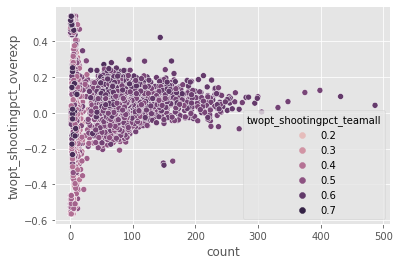

In [47]:
#Relationship Between PT Shooting% Over Exp and A Team's Shots In A Given Period 
sns.scatterplot(data = pbp_twopt_shots_byteam_merged, x = 'count', y = 'twopt_shootingpct_overexp', hue = 'twopt_shootingpct_teamall')

Conclusion : Teams Perform Closer To Expectations Given More Attempts (Shots)
    
    - Next Question: How Do Overall Performance and Shooting Over Expectation Play Into One Another?

In [48]:
pbp_twopt_shots_byteam_merged.shape

(12560, 10)

In [49]:
pbp_twopt_shots_byteam_merged_75 = pbp_twopt_shots_byteam_merged[pbp_twopt_shots_byteam_merged['count'] >= 75]
pbp_twopt_shots_byteam_merged_75.shape

(3900, 10)

<AxesSubplot:xlabel='twopt_shootingpct_teamall', ylabel='twopt_shootingpct_overexp'>

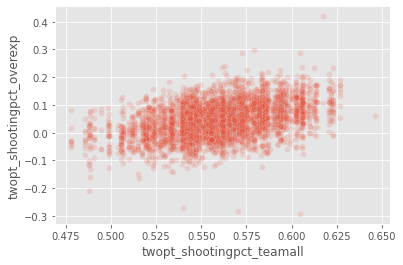

In [50]:
#Relationship Between 2PT Shooting% Over Exp and A Team's Shots In A Given Period 
sns.scatterplot(data = pbp_twopt_shots_byteam_merged_75, x = 'twopt_shootingpct_teamall', y = 'twopt_shootingpct_overexp', alpha = .15)

Conclusion : Teams Who Are Better Overall Do Not Always Overperform League Expectations. There Is A Slight Trend That Better
             2PT Shooting% Teams Are Better Than Expectations.
    
    - Next Question: Do They Have Tendencies, Or Is This Random? Do These Tendencies or Randomness Matter?
    
    - Another Idea: Percentage of Seconds Bins For Teams Over Expectation Based On Overall Team 2PT Shooting% 

For The Model:
    
    - Plug In A Team's 2P Shooting Percentage Late In Games Over Expectation
    
    - Plug In A Teams's Increase In 2P Shooting Percentage Late In Games Over Average
    
    - Plug In A Team's Slope Of Increase In 2P Shooting Percentage Over The Course Of The Game 

In [51]:
pbp_twopt_shots_byteam_merged_75

,secs_remaining_bin_x,shot_team_x,count,team_secs_remain,secs_remaining_bin_y,shot_team_y,twopt_shootingpct_teamsec,twopt_shootingpct_leaguesec,twopt_shootingpct_teamall,twopt_shootingpct_overexp
0,"(-2.4, 120.0]",Abilene Christian,104,"(-2.4, 120.0]_Abilene Christian","(-2.4, 120.0]",Abilene Christian,0.721154,0.564746,0.610122,0.156408
1,"(120.0, 240.0]",Abilene Christian,104,"(120.0, 240.0]_Abilene Christian","(120.0, 240.0]",Abilene Christian,0.576923,0.551880,0.610122,0.025043
2,"(240.0, 360.0]",Abilene Christian,80,"(240.0, 360.0]_Abilene Christian","(240.0, 360.0]",Abilene Christian,0.637500,0.540144,0.610122,0.097356
3,"(360.0, 480.0]",Abilene Christian,78,"(360.0, 480.0]_Abilene Christian","(360.0, 480.0]",Abilene Christian,0.628205,0.527641,0.610122,0.100564
5,"(600.0, 720.0]",Abilene Christian,75,"(600.0, 720.0]_Abilene Christian","(600.0, 720.0]",Abilene Christian,0.586667,0.507455,0.610122,0.079212
...,...,...,...,...,...,...,...,...,...,...
12552,"(1440.0, 1560.0]",Youngstown State,89,"(1440.0, 1560.0]_Youngstown State","(1440.0, 1560.0]",Youngstown State,0.494382,0.504820,0.543717,-0.010438
12554,"(1680.0, 1800.0]",Youngstown State,85,"(1680.0, 1800.0]_Youngstown State","(1680.0, 1800.0]",Youngstown State,0.588235,0.508787,0.543717,0.079448
12556,"(1920.0, 2040.0]",Youngstown State,78,"(1920.0, 2040.0]_Youngstown State","(1920.0, 2040.0]",Youngstown State,0.525641,0.499789,0.543717,0.025852
12557,"(2040.0, 2160.0]",Youngstown State,84,"(2040.0, 2160.0]_Youngstown State","(2040.0, 2160.0]",Youngstown State,0.500000,0.485441,0.543717,0.014559


# Exploratory Data Analysis - Close Games

In [52]:
#Regular Season Games Score Differential
pbp_endgame = pbp.loc[pbp['description'] == 'End of Game']
pbp_endgame.shape

(5246, 37)

In [53]:
pbp_endgame_close = pbp_endgame.loc[pbp_endgame['score_diff'] <= 9]
pbp_endgame_close.shape

#3064/5246 = 58.4%

(3064, 37)

In [54]:
#March Madness Games Score Differential
df['score_diff'] = df.apply(lambda row: row['team1_score'] - row['team2_score'], axis=1)
df.shape

(1246, 106)

In [55]:
df_close = df.loc[df['score_diff'] <= 9]
df_close.shape

#602/1246 = 48.3%

(602, 106)

Conclusion: March Madness Games Are Contested By 9 or Fewer Points Less Often ((Reg) 58.4% vs. (MM) 48.3%)

    - Next Question: How Does Being Tightly Contested Change Our Predictions?
    
    - Next Question: Are Tightly Contested Games More Contested Becuase of Diffence In Seeding?

In [56]:
#Let's Start By Sorting Between Which Seed Differentails Are Common and Uncommon

#Find Absolute Value of The Seed Differential Column
df['seed_diff_abs'] = abs(df['seed_diff'])

#Find Common Seed Differentials, Use Their Volume As A Basis For Observational Credibility
df_seed_diffs = pd.DataFrame(df.groupby('seed_diff_abs')['seed_diff_abs'].count())
df_common_seed_diffs = df_seed_diffs.loc[df_seed_diffs['seed_diff_abs'] >= 20]
df_common_seed_diffs

#There Are 12 "Common" Seed Differentials

,seed_diff_abs
seed_diff_abs,
0,64
1,195
2,27
3,159
4,62
5,129
7,126
8,136
9,89


In [57]:
#Find Uncommon Seed Differentials
df_uncommon_seed_diffs = df_seed_diffs.loc[df_seed_diffs['seed_diff_abs'] < 20]
df_uncommon_seed_diffs

#There Are 3 Highly "Uncommon" Seed Differentials: 6, 10, and 12

,seed_diff_abs
seed_diff_abs,
6,10
10,8
12,4


Using Common Seed Differentials (Which We Took To Remove Variance In Obs), How Can We Predict Scoring Differential?

In [58]:
#Keep "Common" Seed Differentials
df_common_seed_diffs_data = df[(df.seed_diff_abs != 6) & (df.seed_diff_abs != 10) & (df.seed_diff_abs != 12)]
df_common_seed_diffs_data.shape

(1224, 107)

<AxesSubplot:xlabel='seed_diff_abs', ylabel='score_diff'>

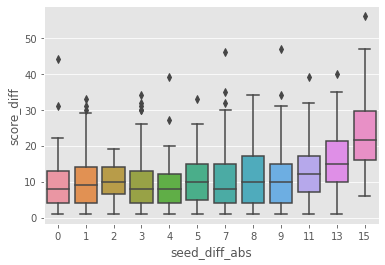

In [59]:
#Look At How Seed Differential Impacts Scoring Differential
sns.boxplot(data = df_common_seed_diffs_data, x = 'seed_diff_abs', y = "score_diff")

Conclusion: Games Could Be Treated Differently Based On Seeding, They Are More Tightly Contested. 

However, we see that there is a TON of variance in this data.

# Exploratory Data Analysis - Predicting Close Seed Diff Games vs. Large Seed Diff Games Only Based On Seed

# Importing KenPom Data

In [349]:
kenpom_cont = pd.read_csv('C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/kenpom_test.csv', encoding='latin-1')
kenpom_cont.shape

(4534, 4)

In [350]:
#Adjust All Team Names From KenPom Dataframe To The Provided Dataset Names
kenpom_cont['team_name'] = [x[:-1] if x.endswith('.') else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ['WI Milwaukee' if x == 'Milwaukee' else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ['VA Commonwealth' if x == 'VCU' else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ['UT San Antonio' if x == 'UTSA' else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ['TX Southern' if x == 'Texas Southern' else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["St Mary's CA" if x == "Saint Mary's" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["St Louis" if x == "Saint Louis" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["St Joseph's PA" if x == "Saint Joseph's" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["St Bonaventure" if x == "St. Bonaventure" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["SF Austin" if x == "Stephen F. Austin" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["S Illinois" if x == "Southern Illinois" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["Northwestern LA" if x == "Northwestern St" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["NC State" if x == "N.C. State" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["NC State" if x == "North Carolina St" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["NC A&T" if x == "North Carolina A&T" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["N Dakota St" if x == "North Dakota St" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["Mt St Mary's" if x == "Mount St. Mary's" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["Monmouth NJ" if x == "Monmouth" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["MTSU" if x == "Middle Tennessee" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["Loyola-Chicago" if x == "Loyola Chicago" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["Kent" if x == "Kent St" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["G Washington" if x == "George Washington" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["FL Gulf Coast" if x == "Florida Gulf Coast" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["F Dickinson" if x == "Fairleigh Dickinson" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["Cal Poly SLO" if x == "Cal Poly" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["C Michigan" if x == "Central Michigan" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["Ark Pine Bluff" if x == "Arkansas Pine Bluff" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["Ark Little Rock" if x == "Arkansas Little Rock" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["Albany NY" if x == "Albany" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["Abilene Chr" if x == "Abilene Christian" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["WI Green Bay" if x == "Green Bay" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["W Michigan" if x == "Western Michigan" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["W Kentucky" if x == "Western Kentucky" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["TAM C. Christi" if x == "Texas A&M Corpus Chris" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["St Peter's" if x == "Saint Peter's" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["St John's" if x == "St. John's" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["Southern Univ" if x == "Southern" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["Santa Barbara" if x == "UC Santa Barbara" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["SE Louisiana" if x == "Southeastern Louisiana" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["S Dakota St" if x == "South Dakota St" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["S Carolina St" if x == "South Carolina St" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["Prairie View" if x == "Prairie View A&M" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["N Kentucky" if x == "Northern Kentucky" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["N Colorado" if x == "Northern Colorado" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["MS Valley St" if x == "Mississippi Valley St" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["Long Island" if x == "LIU" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["IL Chicago" if x == "Illinois Chicago" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["FL Atlantic" if x == "Florida Atlantic" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["ETSU" if x == "East Tennessee St" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["E Washington" if x == "Eastern Washington" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["E Kentucky" if x == "Eastern Kentucky" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["Col Charleston" if x == "College of Charleston" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["Coastal Car" if x == "Coastal Carolina" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["Central Conn" if x == "Central Connecticut" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["CS Northridge" if x == "Cal St. Northridge" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["CS Fullerton" if x == "Cal St. Fullerton" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["CS Bakersfield" if x == "Cal St. Bakersfield" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["Boston Univ" if x == "Boston University" else x for x in kenpom_cont['team_name']]
kenpom_cont['team_name'] = ["American Univ" if x == "American" else x for x in kenpom_cont['team_name']]

In [351]:
#Add Corresponding Primary Keys To Original df For Team 1 and Team 2
df['season'] = df['season'].astype(str)
df['team1_season'] = df['team1_teamname'] + "-" + df['season']
df['team2_season'] = df['team2_teamname'] + "-" + df['season']
df.shape

(1246, 108)

In [352]:
#Reduce First Batch of KenPom Data To Three Relevant Columns and Create Primary Key
kenpom_cont = kenpom_cont[['continuity', 'season','team_name']]
kenpom_cont['season'] = kenpom_cont['season'].astype(str)
kenpom_cont['team_season'] = kenpom_cont['team_name'] + "-" + kenpom_cont['season']
kenpom_cont.head(3)

,continuity,season,team_name,team_season
0,74.8,2018,Abilene Chr,Abilene Chr-2018
1,58.1,2018,Air Force,Air Force-2018
2,21.6,2018,Akron,Akron-2018


In [353]:
#Merge All Team 1 Continuity Scores Onto df
df_kenpom_team1 = pd.merge(df, kenpom_cont, left_on = 'team1_season', right_on = 'team_season', how = 'left')
df_kenpom_team1 = df_kenpom_team1.rename(columns={"continuity": "team1_continuity", "team_name": "team1_name", "team_season": "team1_season"})

In [354]:
#Merge All Team 2 Continuit Scores On df
df_kenpom_team2 = pd.merge(df_kenpom_team1, kenpom_cont, left_on = 'team2_season', right_on = 'team_season', how = 'left')
df_kenpom_team2 = df_kenpom_team2.rename(columns={"continuity": "team2_continuity", "team_name": "team2_name", "team_season": "team2_season"})

In [355]:
#Rename The Past KenPom Data Frame
df_kenpom = df_kenpom_team2
df_kenpom.shape

(1246, 116)

In [356]:
#Get Rid of Duplicate Columns
df_kenpom = df_kenpom.loc[:, ~df_kenpom.columns.duplicated()]
df_kenpom.shape

(1246, 114)

In [357]:
#Import Second Batch of KenPom Data Frame From Paul G
kenpom_height = pd.read_csv('C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/kenpom_2007-2019_height.csv', encoding='latin-1')

In [358]:
#Adjust New Team Names From Second KenPom Dataframe To The Provided Dataset Names
kenpom_height['TeamName'] = [x[:-1] if x.endswith('.') else x for x in kenpom_height['TeamName']]
kenpom_height['TeamName'] = ['TX Southern' if x == 'Texas Southern' else x for x in kenpom_height['TeamName']]
kenpom_height['TeamName'] = ['Loyola-Chicago' if x == 'Loyola Chicago' else x for x in kenpom_height['TeamName']]
kenpom_height['TeamName'] = ["Abilene Chr" if x == "Abilene Christian" else x for x in kenpom_height['TeamName']]
kenpom_height['TeamName'] = ["E Washington" if x == "Eastern Washington" else x for x in kenpom_height['TeamName']]
kenpom_height['TeamName'] = ['VA Commonwealth' if x == 'VCU' else x for x in kenpom_height['TeamName']]
kenpom_height['TeamName'] = ['Santa Barbara' if x == 'UC Santa Barbara' else x for x in kenpom_height['TeamName']]
kenpom_height['TeamName'] = ["St Bonaventure" if x == "St. Bonaventure" else x for x in kenpom_height['TeamName']]
kenpom_height['TeamName'] = ["Mt St Mary's" if x == "Mount St. Mary's" else x for x in kenpom_height['TeamName']]
kenpom_height['TeamName'] = ["N Kentucky" if x == "Northern Kentucky" else x for x in kenpom_height['TeamName']]
kenpom_height['TeamName'] = ["Col Charleston" if x == "College of Charleston" else x for x in kenpom_height['TeamName']]

In [359]:
#Create Primary Key For New KenPom Data
kenpom_height['Season'] = kenpom_height['Season'].astype(str)
kenpom_height['team_season_title'] = kenpom_height['TeamName'] + "-" + kenpom_height['Season']

kenpom_height.head(1)

,Season,TeamName,Size,SizeRank,Hgt5,Hgt5Rank,Hgt4,Hgt4Rank,Hgt3,Hgt3Rank,Hgt2,Hgt2Rank,Hgt1,Hgt1Rank,HgtEff,HgtEffRank,Exp,ExpRank,Bench,BenchRank,Pts5,Pts5Rank,Pts4,Pts4Rank,Pts3,Pts3Rank,Pts2,Pts2Rank,Pts1,Pts1Rank,OR5,OR5Rank,OR4,OR4Rank,OR3,OR3Rank,OR2,OR2Rank,OR1,OR1Rank,DR5,DR5Rank,DR4,DR4Rank,DR3,DR3Rank,DR2,DR2Rank,DR1,DR1Rank,team_season_title
0,2019,Abilene Chr,75.89,299,-0.87,271,-0.71,260,-0.93,295,-0.93,272,-1.18,275,-0.79,277,2.12,52,30.04,186,25.3,31,23.82,64,14.8,312,18.83,205,17.2,278,30.27,281,38.77,24,17.26,146,6.14,307,7.52,199,24.34,228,23.1,220,18.34,203,18.71,70,15.46,104.0,Abilene Chr-2019


In [360]:
#Merge This KenPom Data With the df Data Frame (Team 1)
df_kenpom_height = pd.merge(df_kenpom, kenpom_height, left_on = 'team1_season', right_on = 'team_season_title', how = 'left')

In [361]:
#Change Column Names In Order To Accomodate An Unconfusing Resulting Data Frame After Merge With Team 2
df_kenpom_height = df_kenpom_height.rename(columns={"Season": "season_team1", "TeamName": "name_team1", "Size": "size_team1",
                    "SizeRank" : "sizerank_team1", "Hgt5" : "hgtC_team1","Hgt5Rank" : "hgtCrank_team1","Hgt4" : "hgtPF_team1", 
                    "Hgt4Rank" : "hgtPFrank_team1", "Hgt3" : "hgtSF_team1", "Hgt3Rank" : "hgtSFrank_team1", "Hgt2" : "hgtSG_team1", 
                    "Hgt2Rank" : "hgtSGrank_team1", "Hgt1" : "hgtPG_team1", "Hgt1Rank" : "hgtPGrank_team1", 
                    "HgtEff" : "hgteff_team1", "HgtEffRank" : "hgteffrank_team1", "Exp" : "exp_team1", 
                    "ExpRank" : "exprank_team1", "Bench" : "bench_team1", "BenchRank" : "benchrank_team1", 
                    "Pts5" : "ptC_team1", "Pts5Rank" : "ptsCrank_team1", "Pts4" : "ptPF_team1", "Pts4Rank" : "ptsPFrank_team1",
                    "Pts3" : "ptSF_team1", "Pts3Rank" : "ptsSFrank_team1", "Pts2" : "ptSG_team1", "Pts2Rank" : "ptsSGrank_team1", 
                    "Pts1" : "ptPG_team1", "Pts1Rank" : "ptsPGrank_team1", "OR5" : "orC_team1", "OR5Rank" : "orCrank_team1", 
                    "OR4" : "orPF_team1", "OR4Rank" : "orPFrank_team1", "OR3" : "orSF_team1", "OR3Rank" : "orSFrank_team1",
                    "OR2" : "orSG_team1", "OR2Rank" : "orSGrank_team1", "OR1" : "orPG_team1", "OR1Rank" : "orPGrank_team1", 
                    "DR5" : "drC_team1", "DR5Rank" : "drCrank_team1", "DR4" : "drPF_team1", "DR4Rank" : "drPFrank_team1", 
                    "DR3" : "drSF_team1", "DR3Rank" : "drSFrank_team1", "DR2" : "drSG_team1", "DR2Rank" : "drSGrank_team1",
                    "DR1" : "drPG_team1", "DR1Rank" : "drPGrank_team1", 'team_season_title' : "team_season_title_team1"})

In [362]:
#Merge The Rest of The KenPom Data With the df Data Frame (Team 2)
df_kenpom_height = pd.merge(df_kenpom_height, kenpom_height, left_on = 'team2_season', right_on = 'team_season_title', how = 'left')

In [363]:
#Change Column Names of The Newly Imported Columns For Team 2
df_kenpom_height = df_kenpom_height.rename(columns={"Season": "season_team2", "TeamName": "name_team2", "Size": "size_team2",
                    "SizeRank" : "sizerank_team2", "Hgt5" : "hgtC_team2","Hgt5Rank" : "hgtCrank_team2","Hgt4" : "hgtPF_team2", 
                    "Hgt4Rank" : "hgtPFrank_team2", "Hgt3" : "hgtSF_team2", "Hgt3Rank" : "hgtSFrank_team2", "Hgt2" : "hgtSG_team2", 
                    "Hgt2Rank" : "hgtSGrank_team2", "Hgt1" : "hgtPG_team2", "Hgt1Rank" : "hgtPGrank_team2", 
                    "HgtEff" : "hgteff_team2", "HgtEffRank" : "hgteffrank_team2", "Exp" : "exp_team2", 
                    "ExpRank" : "exprank_team2", "Bench" : "bench_team2", "BenchRank" : "benchrank_team2", 
                    "Pts5" : "ptC_team2", "Pts5Rank" : "ptsCrank_team2", "Pts4" : "ptPF_team2", "Pts4Rank" : "ptsPFrank_team2",
                    "Pts3" : "ptSF_team2", "Pts3Rank" : "ptsSFrank_team2", "Pts2" : "ptSG_team2", "Pts2Rank" : "ptsSGrank_team2", 
                    "Pts1" : "ptPG_team2", "Pts1Rank" : "ptsPGrank_team2", "OR5" : "orC_team2", "OR5Rank" : "orCrank_team2", 
                    "OR4" : "orPF_team2", "OR4Rank" : "orPFrank_team2", "OR3" : "orSF_team2", "OR3Rank" : "orSFrank_team2",
                    "OR2" : "orSG_team2", "OR2Rank" : "orSGrank_team2", "OR1" : "orPG_team2", "OR1Rank" : "orPGrank_team2", 
                    "DR5" : "drC_team2", "DR5Rank" : "drCrank_team2", "DR4" : "drPF_team2", "DR4Rank" : "drPFrank_team2", 
                    "DR3" : "drSF_team2", "DR3Rank" : "drSFrank_team2", "DR2" : "drSG_team2", "DR2Rank" : "drSGrank_team2",
                    "DR1" : "drPG_team2", "DR1Rank" : "drPGrank_team2", 'team_season_title' : "team_season_title_team2"})

In [364]:
#Eliminate Years That Were Not In The KenPom Data Frames
df_kenpom_height = df_kenpom_height.loc[(df_kenpom_height['season_x'] != '2002') & (df_kenpom_height['season_x'] != '2003') &
                                        (df_kenpom_height['season_x'] != '2004') & (df_kenpom_height['season_x'] != '2005') &
                                        (df_kenpom_height['season_x'] != '2006')]
                     
#This Reduces Rows From 1246 to 926 (25.6% Decrease), But Still Leaves Us With Plenty of MM Games (Most Recent Ones Too!)
df_kenpom_height.shape

(926, 216)

In [365]:
df_kenpom_height.head(0)

,team1_id,team1_score,team2_id,team2_score,WLoc,num_ot,team1_position,team2_position,team1_seed,team2_seed,strongseed,weakseed,team1_region,team2_region,slot,team1_teamname,team2_teamname,season_x,host,host_lat,host_long,team1_lat,team1_long,team2_lat,team2_long,team1_coach_id,team1_pt_school_ncaa,team1_pt_overall_ncaa,team1_pt_school_s16,team1_pt_overall_s16,team1_pt_school_ff,team1_pt_overall_ff,team1_pt_career_school_wins,team1_pt_career_school_losses,team1_pt_career_overall_wins,team1_pt_career_overall_losses,team1_pt_team_season_wins,team1_pt_team_season_losses,team1_pt_coach_season_wins,team1_pt_coach_season_losses,team2_coach_id,team2_pt_school_ncaa,team2_pt_overall_ncaa,team2_pt_school_s16,team2_pt_overall_s16,team2_pt_school_ff,team2_pt_overall_ff,team2_pt_career_school_wins,team2_pt_career_school_losses,team2_pt_career_overall_wins,team2_pt_career_overall_losses,team2_pt_team_season_wins,team2_pt_team_season_losses,team2_pt_coach_season_wins,team2_pt_coach_season_losses,team1_ap_final,team1_ap_preseason,team1_coaches_before_final,team1_coaches_preseason,team2_ap_final,team2_ap_preseason,team2_coaches_before_final,team2_coaches_preseason,team1_fg2pct,team1_fg3pct,team1_ftpct,team1_blockpct,team1_oppfg2pct,team1_oppfg3pct,team1_oppftpct,team1_oppblockpct,team1_f3grate,team1_oppf3grate,team1_arate,team1_opparate,team1_stlrate,team1_oppstlrate,team2_fg2pct,team2_fg3pct,team2_ftpct,team2_blockpct,team2_oppfg2pct,team2_oppfg3pct,team2_oppftpct,team2_oppblockpct,team2_f3grate,team2_oppf3grate,team2_arate,team2_opparate,team2_stlrate,team2_oppstlrate,team1_tempo,team1_adjtempo,team1_oe,team1_adjoe,team1_de,team1_adjde,team2_tempo,team2_adjtempo,team2_oe,team2_adjoe,team2_de,team2_adjde,game_id,score_diff,seed_diff,team1_season,team2_season,team1_continuity,season_y,team1_name,team2_continuity,season,team2_name,season_team1,name_team1,size_team1,sizerank_team1,hgtC_team1,hgtCrank_team1,hgtPF_team1,hgtPFrank_team1,hgtSF_team1,hgtSFrank_team1,hgtSG_team1,hgtSGrank_team1,hgtPG_team1,hgtPGrank_team1,hgteff_team1,hgteffrank_team1,exp_team1,exprank_team1,bench_team1,benchrank_team1,ptC_team1,ptsCrank_team1,ptPF_team1,ptsPFrank_team1,ptSF_team1,ptsSFrank_team1,ptSG_team1,ptsSGrank_team1,ptPG_team1,ptsPGrank_team1,orC_team1,orCrank_team1,orPF_team1,orPFrank_team1,orSF_team1,orSFrank_team1,orSG_team1,orSGrank_team1,orPG_team1,orPGrank_team1,drC_team1,drCrank_team1,drPF_team1,drPFrank_team1,drSF_team1,drSFrank_team1,drSG_team1,drSGrank_team1,drPG_team1,drPGrank_team1,team_season_title_team1,season_team2,name_team2,size_team2,sizerank_team2,hgtC_team2,hgtCrank_team2,hgtPF_team2,hgtPFrank_team2,hgtSF_team2,hgtSFrank_team2,hgtSG_team2,hgtSGrank_team2,hgtPG_team2,hgtPGrank_team2,hgteff_team2,hgteffrank_team2,exp_team2,exprank_team2,bench_team2,benchrank_team2,ptC_team2,ptsCrank_team2,ptPF_team2,ptsPFrank_team2,ptSF_team2,ptsSFrank_team2,ptSG_team2,ptsSGrank_team2,ptPG_team2,ptsPGrank_team2,orC_team2,orCrank_team2,orPF_team2,orPFrank_team2,orSF_team2,orSFrank_team2,orSG_team2,orSGrank_team2,orPG_team2,orPGrank_team2,drC_team2,drCrank_team2,drPF_team2,drPFrank_team2,drSF_team2,drSFrank_team2,drSG_team2,drSGrank_team2,drPG_team2,drPGrank_team2,team_season_title_team2


In [366]:
#Create Fields For The Differences Between All Major Numerical Statistics

#Part 1 (Provided Data)
df_kenpom_height['fg2pct_diff'] = df_kenpom_height['team1_fg2pct'] - df_kenpom_height['team2_fg2pct']
df_kenpom_height['fg3pct_diff'] = df_kenpom_height['team1_fg3pct'] - df_kenpom_height['team2_fg3pct']
df_kenpom_height['ftpct_diff'] = df_kenpom_height['team1_ftpct'] - df_kenpom_height['team2_ftpct']
df_kenpom_height['blockpct_diff'] = df_kenpom_height['team1_blockpct'] - df_kenpom_height['team2_blockpct']
df_kenpom_height['oppfg2pct_diff'] = df_kenpom_height['team1_oppfg2pct'] - df_kenpom_height['team2_oppfg2pct']
df_kenpom_height['oppfg3pct_diff'] = df_kenpom_height['team1_oppfg3pct'] - df_kenpom_height['team2_oppfg3pct']
df_kenpom_height['oppftpct_diff'] = df_kenpom_height['team1_oppftpct'] - df_kenpom_height['team2_oppftpct']
df_kenpom_height['oppblockpct_diff'] = df_kenpom_height['team1_oppblockpct'] - df_kenpom_height['team2_oppblockpct']
df_kenpom_height['f3grate_diff'] = df_kenpom_height['team1_f3grate'] - df_kenpom_height['team2_f3grate']
df_kenpom_height['oppf3grate_diff'] = df_kenpom_height['team1_oppf3grate'] - df_kenpom_height['team2_oppf3grate']
df_kenpom_height['arate_diff'] = df_kenpom_height['team1_arate'] - df_kenpom_height['team2_arate']
df_kenpom_height['opparate_diff'] = df_kenpom_height['team1_opparate'] - df_kenpom_height['team2_opparate']
df_kenpom_height['stlrate_diff'] = df_kenpom_height['team1_stlrate'] - df_kenpom_height['team2_stlrate']
df_kenpom_height['oppstlrate_diff'] = df_kenpom_height['team1_oppstlrate'] - df_kenpom_height['team2_oppstlrate']
df_kenpom_height['tempo_diff'] = df_kenpom_height['team1_tempo'] - df_kenpom_height['team2_tempo']
df_kenpom_height['adjtempo_diff'] = df_kenpom_height['team1_adjtempo'] - df_kenpom_height['team2_adjtempo']
df_kenpom_height['oe_diff'] = df_kenpom_height['team1_oe'] - df_kenpom_height['team2_oe']
df_kenpom_height['adjoe_diff'] = df_kenpom_height['team1_adjoe'] - df_kenpom_height['team2_adjoe']
df_kenpom_height['de_diff'] = df_kenpom_height['team1_de'] - df_kenpom_height['team2_de']
df_kenpom_height['adjde_diff'] = df_kenpom_height['team1_adjde'] - df_kenpom_height['team2_adjde']

In [367]:
#Part 2 (Size, Height, and Playing Experience)
df_kenpom_height['size_diff'] = df_kenpom_height['size_team1'] - df_kenpom_height['size_team2']
df_kenpom_height['sizerank_diff'] = df_kenpom_height['sizerank_team1'] - df_kenpom_height['sizerank_team2']
df_kenpom_height['hgtC_diff'] = df_kenpom_height['hgtC_team1'] - df_kenpom_height['hgtC_team2']
df_kenpom_height['hgtPF_diff'] = df_kenpom_height['hgtPF_team1'] - df_kenpom_height['hgtPF_team2']
df_kenpom_height['hgtSF_diff'] = df_kenpom_height['hgtSF_team1'] - df_kenpom_height['hgtSF_team2']
df_kenpom_height['hgtSG_diff'] = df_kenpom_height['hgtSG_team1'] - df_kenpom_height['hgtSG_team2']
df_kenpom_height['hgtPG_diff'] = df_kenpom_height['hgtPG_team1'] - df_kenpom_height['hgtPG_team2']
df_kenpom_height['cont_diff'] = df_kenpom_height['team1_continuity'] - df_kenpom_height['team2_continuity']
df_kenpom_height['hgteff_diff'] = df_kenpom_height['hgteff_team1'] - df_kenpom_height['hgteff_team2']
df_kenpom_height['hgteffrank_diff'] = df_kenpom_height['hgteffrank_team1'] - df_kenpom_height['hgteffrank_team2']
df_kenpom_height['exp_diff'] = df_kenpom_height['exp_team1'] - df_kenpom_height['exp_team2']
df_kenpom_height['exprank_diff'] = df_kenpom_height['exprank_team1'] - df_kenpom_height['exprank_team2']
df_kenpom_height['bench_diff'] = df_kenpom_height['bench_team1'] - df_kenpom_height['bench_team2']
df_kenpom_height['benchrank_diff'] = df_kenpom_height['benchrank_team1'] - df_kenpom_height['benchrank_team2']

#Part 3 (Points, Offensive Rating, and Defensive Rating by Position)

#Points
df_kenpom_height['ptC_diff'] = df_kenpom_height['ptC_team1'] - df_kenpom_height['ptC_team2']
df_kenpom_height['ptsCrank_diff'] = df_kenpom_height['ptsCrank_team1'] - df_kenpom_height['ptsCrank_team2']
df_kenpom_height['ptPF_diff'] = df_kenpom_height['ptPF_team1'] - df_kenpom_height['ptPF_team2']
df_kenpom_height['ptsPFrank_diff'] = df_kenpom_height['ptsPFrank_team1'] - df_kenpom_height['ptsPFrank_team2']
df_kenpom_height['ptSF_diff'] = df_kenpom_height['ptSF_team1'] - df_kenpom_height['ptSF_team2']
df_kenpom_height['ptsSFrank_diff'] = df_kenpom_height['ptsSFrank_team1'] - df_kenpom_height['ptsSFrank_team2']
df_kenpom_height['ptSG_diff'] = df_kenpom_height['ptSG_team1'] - df_kenpom_height['ptSG_team2']
df_kenpom_height['ptsSGrank_diff'] = df_kenpom_height['ptsSGrank_team1'] - df_kenpom_height['ptsSGrank_team2']
df_kenpom_height['ptPG_diff'] = df_kenpom_height['ptPG_team1'] - df_kenpom_height['ptPG_team2']
df_kenpom_height['ptsPGrank_diff'] = df_kenpom_height['ptsPGrank_team1'] - df_kenpom_height['ptsPGrank_team2']

#Offensive Rating
df_kenpom_height['orC_diff'] = df_kenpom_height['orC_team1'] - df_kenpom_height['orC_team2']
df_kenpom_height['orCrank_diff'] = df_kenpom_height['orCrank_team1'] - df_kenpom_height['orCrank_team2']
df_kenpom_height['orPF_diff'] = df_kenpom_height['orPF_team1'] - df_kenpom_height['orPF_team2']
df_kenpom_height['orPFrank_diff'] = df_kenpom_height['orPFrank_team1'] - df_kenpom_height['orPFrank_team2']
df_kenpom_height['orSF_diff'] = df_kenpom_height['orSF_team1'] - df_kenpom_height['orSF_team2']
df_kenpom_height['orSFrank_diff'] = df_kenpom_height['orSFrank_team1'] - df_kenpom_height['orSFrank_team2']
df_kenpom_height['orSG_diff'] = df_kenpom_height['orSG_team1'] - df_kenpom_height['orSG_team2']
df_kenpom_height['orSGrank_diff'] = df_kenpom_height['orSGrank_team1'] - df_kenpom_height['orSGrank_team2']
df_kenpom_height['orPG_diff'] = df_kenpom_height['orPG_team1'] - df_kenpom_height['orPG_team2']
df_kenpom_height['orPGrank_diff'] = df_kenpom_height['orPGrank_team1'] - df_kenpom_height['orPGrank_team2']

#Offensive Rating
df_kenpom_height['drPG_diff'] = df_kenpom_height['drPG_team1'] - df_kenpom_height['drPG_team2']
df_kenpom_height['drPGrank_diff'] = df_kenpom_height['drPGrank_team1'] - df_kenpom_height['drPGrank_team2']
df_kenpom_height['drPF_diff'] = df_kenpom_height['drPF_team1'] - df_kenpom_height['drPF_team2']
df_kenpom_height['drPFrank_diff'] = df_kenpom_height['drPFrank_team1'] - df_kenpom_height['drPFrank_team2']
df_kenpom_height['drC_diff'] = df_kenpom_height['drC_team1'] - df_kenpom_height['drC_team2']
df_kenpom_height['drCrank_diff'] = df_kenpom_height['drCrank_team1'] - df_kenpom_height['drCrank_team2']
df_kenpom_height['drSF_diff'] = df_kenpom_height['drSF_team1'] - df_kenpom_height['drSF_team2']
df_kenpom_height['drSFrank_diff'] = df_kenpom_height['drSFrank_team1'] - df_kenpom_height['drSFrank_team2']
df_kenpom_height['drSG_diff'] = df_kenpom_height['drSG_team1'] - df_kenpom_height['drSG_team2']
df_kenpom_height['drSGrank_diff'] = df_kenpom_height['drSGrank_team1'] - df_kenpom_height['drSGrank_team2']

In [368]:
#Export This Final Data Frame
df_kenpom_height.to_csv("C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/df_kenpom_height_n.csv", index=False)

In [369]:
#Change The Name To df For The Logistic Regression Model
df = df_kenpom_height

In [370]:
#Manually Alter And Import df_kenpom_height.csv
df = pd.read_csv('C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/df_kenpom_height.csv', encoding='latin-1')
df.head(1)

,team1_id,team1_score,team2_id,team2_score,WLoc,num_ot,team1_position,team2_position,team1_seed,team2_seed,strongseed,weakseed,team1_region,team2_region,slot,team1_teamname,team2_teamname,season_x,host,host_lat,host_long,team1_lat,team1_long,team2_lat,team2_long,team1_coach_id,team1_pt_school_ncaa,team1_pt_overall_ncaa,team1_pt_school_s16,team1_pt_overall_s16,team1_pt_school_ff,team1_pt_overall_ff,team1_pt_career_school_wins,team1_pt_career_school_losses,team1_pt_career_overall_wins,team1_pt_career_overall_losses,team1_pt_team_season_wins,team1_pt_team_season_losses,team1_pt_coach_season_wins,team1_pt_coach_season_losses,team2_coach_id,team2_pt_school_ncaa,team2_pt_overall_ncaa,team2_pt_school_s16,team2_pt_overall_s16,team2_pt_school_ff,team2_pt_overall_ff,team2_pt_career_school_wins,team2_pt_career_school_losses,team2_pt_career_overall_wins,team2_pt_career_overall_losses,team2_pt_team_season_wins,team2_pt_team_season_losses,team2_pt_coach_season_wins,team2_pt_coach_season_losses,team1_ap_final,team1_ap_preseason,team1_coaches_before_final,team1_coaches_preseason,team2_ap_final,team2_ap_preseason,team2_coaches_before_final,team2_coaches_preseason,team1_fg2pct,team1_fg3pct,team1_ftpct,team1_blockpct,team1_oppfg2pct,team1_oppfg3pct,team1_oppftpct,team1_oppblockpct,team1_f3grate,team1_oppf3grate,team1_arate,team1_opparate,team1_stlrate,team1_oppstlrate,team2_fg2pct,team2_fg3pct,team2_ftpct,team2_blockpct,team2_oppfg2pct,team2_oppfg3pct,team2_oppftpct,team2_oppblockpct,team2_f3grate,team2_oppf3grate,team2_arate,team2_opparate,team2_stlrate,team2_oppstlrate,team1_tempo,team1_adjtempo,team1_oe,team1_adjoe,team1_de,team1_adjde,team2_tempo,team2_adjtempo,team2_oe,team2_adjoe,team2_de,team2_adjde,game_id,score_diff,seed_diff,team1_season,team2_season,team1_continuity,season_y,team1_name,team2_continuity,season,team2_name,season_team1,name_team1,size_team1,sizerank_team1,hgtC_team1,hgtCrank_team1,hgtPF_team1,hgtPFrank_team1,hgtSF_team1,hgtSFrank_team1,hgtSG_team1,hgtSGrank_team1,hgtPG_team1,hgtPGrank_team1,hgteff_team1,hgteffrank_team1,exp_team1,exprank_team1,bench_team1,benchrank_team1,ptC_team1,ptsCrank_team1,ptPF_team1,ptsPFrank_team1,ptSF_team1,ptsSFrank_team1,ptSG_team1,ptsSGrank_team1,ptPG_team1,ptsPGrank_team1,orC_team1,orCrank_team1,orPF_team1,orPFrank_team1,orSF_team1,orSFrank_team1,orSG_team1,orSGrank_team1,orPG_team1,orPGrank_team1,drC_team1,drCrank_team1,drPF_team1,drPFrank_team1,drSF_team1,drSFrank_team1,drSG_team1,drSGrank_team1,drPG_team1,drPGrank_team1,team_season_title_team1,season_team2,name_team2,size_team2,sizerank_team2,hgtC_team2,hgtCrank_team2,hgtPF_team2,hgtPFrank_team2,hgtSF_team2,hgtSFrank_team2,hgtSG_team2,hgtSGrank_team2,hgtPG_team2,hgtPGrank_team2,hgteff_team2,hgteffrank_team2,exp_team2,exprank_team2,bench_team2,benchrank_team2,ptC_team2,ptsCrank_team2,ptPF_team2,ptsPFrank_team2,ptSF_team2,ptsSFrank_team2,ptSG_team2,ptsSGrank_team2,ptPG_team2,ptsPGrank_team2,orC_team2,orCrank_team2,orPF_team2,orPFrank_team2,orSF_team2,orSFrank_team2,orSG_team2,orSGrank_team2,orPG_team2,orPGrank_team2,drC_team2,drCrank_team2,drPF_team2,drPFrank_team2,drSF_team2,drSFrank_team2,drSG_team2,drSGrank_team2,drPG_team2,drPGrank_team2,team_season_title_team2,fg2pct_diff,fg3pct_diff,ftpct_diff,blockpct_diff,oppfg2pct_diff,oppfg3pct_diff,oppftpct_diff,oppblockpct_diff,f3grate_diff,oppf3grate_diff,arate_diff,opparate_diff,stlrate_diff,oppstlrate_diff,tempo_diff,adjtempo_diff,oe_diff,adjoe_diff,de_diff,adjde_diff,size_diff,sizerank_diff,hgtC_diff,hgtPF_diff,hgtSF_diff,hgtSG_diff,hgtPG_diff,cont_diff,hgteff_diff,hgteffrank_diff,exp_diff,exprank_diff,bench_diff,benchrank_diff,ptC_diff,ptsCrank_diff,ptPF_diff,ptsPFrank_diff,ptSF_diff,ptsSFrank_diff,ptSG_diff,ptsSGrank_diff,ptPG_diff,ptsPGrank_diff,orC_diff,orCrank_diff,orPF_diff,orPFrank_diff,orSF_diff,orSFrank_diff,orSG_diff,orSGrank_diff,orPG_diff,orPGrank_diff,drPG_diff,drPGrank_diff,drPF_diff,drPFrank_diff,drC_diff,drCrank_diff,drSF_diff,drSFrank_diff,drSG_diff,drSGrank_diff,exp_win1,ex

In [371]:
#Import Data Frame With Home Court Advantages
kenpom_hca = pd.read_csv('C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/kenpom_hca.csv', encoding='latin-1')

#Rename Team Column
kenpom_hca = kenpom_hca.rename(columns={"ï»¿Team": "team_name"})
kenpom_hca.head(3)

,team_name,Conf,HCA,PF,Pts,NST,Blk,Elev
0,Texas Tech,B12,4.8,-5.5,11.2,-1.6,1.6,3200
1,West Virginia,B12,4.7,-5.2,12.0,-2.6,2.1,1000
2,Air Force,MWC,4.6,-3.8,10.6,-1.1,1.4,7000


In [372]:
#Change The KenPom Team Names
kenpom_hca['team_name'] = [x[:-1] if x.endswith('.') else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ['WI Milwaukee' if x == 'Milwaukee' else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ['VA Commonwealth' if x == 'VCU' else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ['UT San Antonio' if x == 'UTSA' else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ['TX Southern' if x == 'Texas Southern' else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["St Mary's CA" if x == "Saint Mary's" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["St Louis" if x == "Saint Louis" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["St Joseph's PA" if x == "Saint Joseph's" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["St Bonaventure" if x == "St. Bonaventure" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["SF Austin" if x == "Stephen F. Austin" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["S Illinois" if x == "Southern Illinois" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["Northwestern LA" if x == "Northwestern St" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["NC State" if x == "N.C. State" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["NC A&T" if x == "North Carolina A&T" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["N Dakota St" if x == "North Dakota St" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["Mt St Mary's" if x == "Mount St. Mary's" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["Monmouth NJ" if x == "Monmouth" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["MTSU" if x == "Middle Tennessee" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["Loyola-Chicago" if x == "Loyola Chicago" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["Kent" if x == "Kent St" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["G Washington" if x == "George Washington" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["FL Gulf Coast" if x == "Florida Gulf Coast" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["F Dickinson" if x == "Fairleigh Dickinson" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["Cal Poly SLO" if x == "Cal Poly" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["C Michigan" if x == "Central Michigan" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["Ark Pine Bluff" if x == "Arkansas Pine Bluff" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["Ark Little Rock" if x == "Arkansas Little Rock" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["Albany NY" if x == "Albany" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["Abilene Chr" if x == "Abilene Christian" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["WI Green Bay" if x == "Green Bay" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["W Michigan" if x == "Western Michigan" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["W Kentucky" if x == "Western Kentucky" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["TAM C. Christi" if x == "Texas A&M Corpus Chris" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["St Peter's" if x == "Saint Peter's" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["St John's" if x == "St. John's" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["Southern Univ" if x == "Southern" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["Santa Barbara" if x == "UC Santa Barbara" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["SE Louisiana" if x == "Southeastern Louisiana" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["S Dakota St" if x == "South Dakota St" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["S Carolina St" if x == "South Carolina St" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["Prairie View" if x == "Prairie View A&M" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["N Kentucky" if x == "Northern Kentucky" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["N Colorado" if x == "Northern Colorado" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["MS Valley St" if x == "Mississippi Valley St" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["Long Island" if x == "LIU" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["IL Chicago" if x == "Illinois Chicago" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["FL Atlantic" if x == "Florida Atlantic" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["ETSU" if x == "East Tennessee St" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["E Washington" if x == "Eastern Washington" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["E Kentucky" if x == "Eastern Kentucky" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["Col Charleston" if x == "College of Charleston" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["Coastal Car" if x == "Coastal Carolina" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["Central Conn" if x == "Central Connecticut" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["CS Northridge" if x == "Cal St. Northridge" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["CS Fullerton" if x == "Cal St. Fullerton" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["CS Bakersfield" if x == "Cal St. Bakersfield" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["Boston Univ" if x == "Boston University" else x for x in kenpom_hca['team_name']]
kenpom_hca['team_name'] = ["American Univ" if x == "American" else x for x in kenpom_hca['team_name']]

In [373]:
#Merge Team 1 Data Onto The Full Data Frame
df1 = pd.merge(df, kenpom_hca, left_on = 'team1_teamname', right_on = 'team_name', how = 'inner')
df1 = df1.rename(columns={"HCA": "hca_team1", "PF": "pf_team1", "Pts": "pts_team1",
                          "NST" : "nst_team1", "Blk" : "blk_team1","Elev" : "elev_team1"})
#This Removes 2 Rows
df1.head(1)

,team1_id,team1_score,team2_id,team2_score,WLoc,num_ot,team1_position,team2_position,team1_seed,team2_seed,strongseed,weakseed,team1_region,team2_region,slot,team1_teamname,team2_teamname,season_x,host,host_lat,host_long,team1_lat,team1_long,team2_lat,team2_long,team1_coach_id,team1_pt_school_ncaa,team1_pt_overall_ncaa,team1_pt_school_s16,team1_pt_overall_s16,team1_pt_school_ff,team1_pt_overall_ff,team1_pt_career_school_wins,team1_pt_career_school_losses,team1_pt_career_overall_wins,team1_pt_career_overall_losses,team1_pt_team_season_wins,team1_pt_team_season_losses,team1_pt_coach_season_wins,team1_pt_coach_season_losses,team2_coach_id,team2_pt_school_ncaa,team2_pt_overall_ncaa,team2_pt_school_s16,team2_pt_overall_s16,team2_pt_school_ff,team2_pt_overall_ff,team2_pt_career_school_wins,team2_pt_career_school_losses,team2_pt_career_overall_wins,team2_pt_career_overall_losses,team2_pt_team_season_wins,team2_pt_team_season_losses,team2_pt_coach_season_wins,team2_pt_coach_season_losses,team1_ap_final,team1_ap_preseason,team1_coaches_before_final,team1_coaches_preseason,team2_ap_final,team2_ap_preseason,team2_coaches_before_final,team2_coaches_preseason,team1_fg2pct,team1_fg3pct,team1_ftpct,team1_blockpct,team1_oppfg2pct,team1_oppfg3pct,team1_oppftpct,team1_oppblockpct,team1_f3grate,team1_oppf3grate,team1_arate,team1_opparate,team1_stlrate,team1_oppstlrate,team2_fg2pct,team2_fg3pct,team2_ftpct,team2_blockpct,team2_oppfg2pct,team2_oppfg3pct,team2_oppftpct,team2_oppblockpct,team2_f3grate,team2_oppf3grate,team2_arate,team2_opparate,team2_stlrate,team2_oppstlrate,team1_tempo,team1_adjtempo,team1_oe,team1_adjoe,team1_de,team1_adjde,team2_tempo,team2_adjtempo,team2_oe,team2_adjoe,team2_de,team2_adjde,game_id,score_diff,seed_diff,team1_season,team2_season,team1_continuity,season_y,team1_name,team2_continuity,season,team2_name,season_team1,name_team1,size_team1,sizerank_team1,hgtC_team1,hgtCrank_team1,hgtPF_team1,hgtPFrank_team1,hgtSF_team1,hgtSFrank_team1,hgtSG_team1,hgtSGrank_team1,hgtPG_team1,hgtPGrank_team1,hgteff_team1,hgteffrank_team1,exp_team1,exprank_team1,bench_team1,benchrank_team1,ptC_team1,ptsCrank_team1,ptPF_team1,ptsPFrank_team1,ptSF_team1,ptsSFrank_team1,ptSG_team1,ptsSGrank_team1,ptPG_team1,ptsPGrank_team1,orC_team1,orCrank_team1,orPF_team1,orPFrank_team1,orSF_team1,orSFrank_team1,orSG_team1,orSGrank_team1,orPG_team1,orPGrank_team1,drC_team1,drCrank_team1,drPF_team1,drPFrank_team1,drSF_team1,drSFrank_team1,drSG_team1,drSGrank_team1,drPG_team1,drPGrank_team1,team_season_title_team1,season_team2,name_team2,size_team2,sizerank_team2,hgtC_team2,hgtCrank_team2,hgtPF_team2,hgtPFrank_team2,hgtSF_team2,hgtSFrank_team2,hgtSG_team2,hgtSGrank_team2,hgtPG_team2,hgtPGrank_team2,hgteff_team2,hgteffrank_team2,exp_team2,exprank_team2,bench_team2,benchrank_team2,ptC_team2,ptsCrank_team2,ptPF_team2,ptsPFrank_team2,ptSF_team2,ptsSFrank_team2,ptSG_team2,ptsSGrank_team2,ptPG_team2,ptsPGrank_team2,orC_team2,orCrank_team2,orPF_team2,orPFrank_team2,orSF_team2,orSFrank_team2,orSG_team2,orSGrank_team2,orPG_team2,orPGrank_team2,drC_team2,drCrank_team2,drPF_team2,drPFrank_team2,drSF_team2,drSFrank_team2,drSG_team2,drSGrank_team2,drPG_team2,drPGrank_team2,team_season_title_team2,fg2pct_diff,fg3pct_diff,ftpct_diff,blockpct_diff,oppfg2pct_diff,oppfg3pct_diff,oppftpct_diff,oppblockpct_diff,f3grate_diff,oppf3grate_diff,arate_diff,opparate_diff,stlrate_diff,oppstlrate_diff,tempo_diff,adjtempo_diff,oe_diff,adjoe_diff,de_diff,adjde_diff,size_diff,sizerank_diff,hgtC_diff,hgtPF_diff,hgtSF_diff,hgtSG_diff,hgtPG_diff,cont_diff,hgteff_diff,hgteffrank_diff,exp_diff,exprank_diff,bench_diff,benchrank_diff,ptC_diff,ptsCrank_diff,ptPF_diff,ptsPFrank_diff,ptSF_diff,ptsSFrank_diff,ptSG_diff,ptsSGrank_diff,ptPG_diff,ptsPGrank_diff,orC_diff,orCrank_diff,orPF_diff,orPFrank_diff,orSF_diff,orSFrank_diff,orSG_diff,orSGrank_diff,orPG_diff,orPGrank_diff,drPG_diff,drPGrank_diff,drPF_diff,drPFrank_diff,drC_diff,drCrank_diff,drSF_diff,drSFrank_diff,drSG_diff,drSGrank_diff,exp_win1,ex

In [374]:
#Merge Team 2 Data Onto The Full Data Frame
df2 = pd.merge(df1, kenpom_hca, left_on = 'team2_teamname', right_on = 'team_name', how = 'inner')
df = df2.rename(columns={"HCA": "hca_team2", "PF": "pf_team2", "Pts": "pts_team2",
                          "NST" : "nst_team2", "Blk" : "blk_team2","Elev" : "elev_team2"})

df.head(1)

,team1_id,team1_score,team2_id,team2_score,WLoc,num_ot,team1_position,team2_position,team1_seed,team2_seed,strongseed,weakseed,team1_region,team2_region,slot,team1_teamname,team2_teamname,season_x,host,host_lat,host_long,team1_lat,team1_long,team2_lat,team2_long,team1_coach_id,team1_pt_school_ncaa,team1_pt_overall_ncaa,team1_pt_school_s16,team1_pt_overall_s16,team1_pt_school_ff,team1_pt_overall_ff,team1_pt_career_school_wins,team1_pt_career_school_losses,team1_pt_career_overall_wins,team1_pt_career_overall_losses,team1_pt_team_season_wins,team1_pt_team_season_losses,team1_pt_coach_season_wins,team1_pt_coach_season_losses,team2_coach_id,team2_pt_school_ncaa,team2_pt_overall_ncaa,team2_pt_school_s16,team2_pt_overall_s16,team2_pt_school_ff,team2_pt_overall_ff,team2_pt_career_school_wins,team2_pt_career_school_losses,team2_pt_career_overall_wins,team2_pt_career_overall_losses,team2_pt_team_season_wins,team2_pt_team_season_losses,team2_pt_coach_season_wins,team2_pt_coach_season_losses,team1_ap_final,team1_ap_preseason,team1_coaches_before_final,team1_coaches_preseason,team2_ap_final,team2_ap_preseason,team2_coaches_before_final,team2_coaches_preseason,team1_fg2pct,team1_fg3pct,team1_ftpct,team1_blockpct,team1_oppfg2pct,team1_oppfg3pct,team1_oppftpct,team1_oppblockpct,team1_f3grate,team1_oppf3grate,team1_arate,team1_opparate,team1_stlrate,team1_oppstlrate,team2_fg2pct,team2_fg3pct,team2_ftpct,team2_blockpct,team2_oppfg2pct,team2_oppfg3pct,team2_oppftpct,team2_oppblockpct,team2_f3grate,team2_oppf3grate,team2_arate,team2_opparate,team2_stlrate,team2_oppstlrate,team1_tempo,team1_adjtempo,team1_oe,team1_adjoe,team1_de,team1_adjde,team2_tempo,team2_adjtempo,team2_oe,team2_adjoe,team2_de,team2_adjde,game_id,score_diff,seed_diff,team1_season,team2_season,team1_continuity,season_y,team1_name,team2_continuity,season,team2_name,season_team1,name_team1,size_team1,sizerank_team1,hgtC_team1,hgtCrank_team1,hgtPF_team1,hgtPFrank_team1,hgtSF_team1,hgtSFrank_team1,hgtSG_team1,hgtSGrank_team1,hgtPG_team1,hgtPGrank_team1,hgteff_team1,hgteffrank_team1,exp_team1,exprank_team1,bench_team1,benchrank_team1,ptC_team1,ptsCrank_team1,ptPF_team1,ptsPFrank_team1,ptSF_team1,ptsSFrank_team1,ptSG_team1,ptsSGrank_team1,ptPG_team1,ptsPGrank_team1,orC_team1,orCrank_team1,orPF_team1,orPFrank_team1,orSF_team1,orSFrank_team1,orSG_team1,orSGrank_team1,orPG_team1,orPGrank_team1,drC_team1,drCrank_team1,drPF_team1,drPFrank_team1,drSF_team1,drSFrank_team1,drSG_team1,drSGrank_team1,drPG_team1,drPGrank_team1,team_season_title_team1,season_team2,name_team2,size_team2,sizerank_team2,hgtC_team2,hgtCrank_team2,hgtPF_team2,hgtPFrank_team2,hgtSF_team2,hgtSFrank_team2,hgtSG_team2,hgtSGrank_team2,hgtPG_team2,hgtPGrank_team2,hgteff_team2,hgteffrank_team2,exp_team2,exprank_team2,bench_team2,benchrank_team2,ptC_team2,ptsCrank_team2,ptPF_team2,ptsPFrank_team2,ptSF_team2,ptsSFrank_team2,ptSG_team2,ptsSGrank_team2,ptPG_team2,ptsPGrank_team2,orC_team2,orCrank_team2,orPF_team2,orPFrank_team2,orSF_team2,orSFrank_team2,orSG_team2,orSGrank_team2,orPG_team2,orPGrank_team2,drC_team2,drCrank_team2,drPF_team2,drPFrank_team2,drSF_team2,drSFrank_team2,drSG_team2,drSGrank_team2,drPG_team2,drPGrank_team2,team_season_title_team2,fg2pct_diff,fg3pct_diff,ftpct_diff,blockpct_diff,oppfg2pct_diff,oppfg3pct_diff,oppftpct_diff,oppblockpct_diff,f3grate_diff,oppf3grate_diff,arate_diff,opparate_diff,stlrate_diff,oppstlrate_diff,tempo_diff,adjtempo_diff,oe_diff,adjoe_diff,de_diff,adjde_diff,size_diff,sizerank_diff,hgtC_diff,hgtPF_diff,hgtSF_diff,hgtSG_diff,hgtPG_diff,cont_diff,hgteff_diff,hgteffrank_diff,exp_diff,exprank_diff,bench_diff,benchrank_diff,ptC_diff,ptsCrank_diff,ptPF_diff,ptsPFrank_diff,ptSF_diff,ptsSFrank_diff,ptSG_diff,ptsSGrank_diff,ptPG_diff,ptsPGrank_diff,orC_diff,orCrank_diff,orPF_diff,orPFrank_diff,orSF_diff,orSFrank_diff,orSG_diff,orSGrank_diff,orPG_diff,orPGrank_diff,drPG_diff,drPGrank_diff,drPF_diff,drPFrank_diff,drC_diff,drCrank_diff,drSF_diff,drSFrank_diff,drSG_diff,drSGrank_diff,exp_win1,ex

In [375]:
#Make These Home Court Advantage Statistics Into Differences
df['hca_diff'] = df['hca_team1'] - df['hca_team2']
df['pf_diff'] = df['pf_team1'] - df['pf_team2']
df['pts_diff'] = df['pts_team1'] - df['pts_team2']
df['nst_diff'] = df['nst_team1'] - df['nst_team2']
df['blk_diff'] = df['blk_team1'] - df['blk_team2']
df['elev_diff'] = df['elev_team1'] - df['elev_team2']

df.shape

(916, 306)

In [376]:
df.head(1)

,team1_id,team1_score,team2_id,team2_score,WLoc,num_ot,team1_position,team2_position,team1_seed,team2_seed,strongseed,weakseed,team1_region,team2_region,slot,team1_teamname,team2_teamname,season_x,host,host_lat,host_long,team1_lat,team1_long,team2_lat,team2_long,team1_coach_id,team1_pt_school_ncaa,team1_pt_overall_ncaa,team1_pt_school_s16,team1_pt_overall_s16,team1_pt_school_ff,team1_pt_overall_ff,team1_pt_career_school_wins,team1_pt_career_school_losses,team1_pt_career_overall_wins,team1_pt_career_overall_losses,team1_pt_team_season_wins,team1_pt_team_season_losses,team1_pt_coach_season_wins,team1_pt_coach_season_losses,team2_coach_id,team2_pt_school_ncaa,team2_pt_overall_ncaa,team2_pt_school_s16,team2_pt_overall_s16,team2_pt_school_ff,team2_pt_overall_ff,team2_pt_career_school_wins,team2_pt_career_school_losses,team2_pt_career_overall_wins,team2_pt_career_overall_losses,team2_pt_team_season_wins,team2_pt_team_season_losses,team2_pt_coach_season_wins,team2_pt_coach_season_losses,team1_ap_final,team1_ap_preseason,team1_coaches_before_final,team1_coaches_preseason,team2_ap_final,team2_ap_preseason,team2_coaches_before_final,team2_coaches_preseason,team1_fg2pct,team1_fg3pct,team1_ftpct,team1_blockpct,team1_oppfg2pct,team1_oppfg3pct,team1_oppftpct,team1_oppblockpct,team1_f3grate,team1_oppf3grate,team1_arate,team1_opparate,team1_stlrate,team1_oppstlrate,team2_fg2pct,team2_fg3pct,team2_ftpct,team2_blockpct,team2_oppfg2pct,team2_oppfg3pct,team2_oppftpct,team2_oppblockpct,team2_f3grate,team2_oppf3grate,team2_arate,team2_opparate,team2_stlrate,team2_oppstlrate,team1_tempo,team1_adjtempo,team1_oe,team1_adjoe,team1_de,team1_adjde,team2_tempo,team2_adjtempo,team2_oe,team2_adjoe,team2_de,team2_adjde,game_id,score_diff,seed_diff,team1_season,team2_season,team1_continuity,season_y,team1_name,team2_continuity,season,team2_name,season_team1,name_team1,size_team1,sizerank_team1,hgtC_team1,hgtCrank_team1,hgtPF_team1,hgtPFrank_team1,hgtSF_team1,hgtSFrank_team1,hgtSG_team1,hgtSGrank_team1,hgtPG_team1,hgtPGrank_team1,hgteff_team1,hgteffrank_team1,exp_team1,exprank_team1,bench_team1,benchrank_team1,ptC_team1,ptsCrank_team1,ptPF_team1,ptsPFrank_team1,ptSF_team1,ptsSFrank_team1,ptSG_team1,ptsSGrank_team1,ptPG_team1,ptsPGrank_team1,orC_team1,orCrank_team1,orPF_team1,orPFrank_team1,orSF_team1,orSFrank_team1,orSG_team1,orSGrank_team1,orPG_team1,orPGrank_team1,drC_team1,drCrank_team1,drPF_team1,drPFrank_team1,drSF_team1,drSFrank_team1,drSG_team1,drSGrank_team1,drPG_team1,drPGrank_team1,team_season_title_team1,season_team2,name_team2,size_team2,sizerank_team2,hgtC_team2,hgtCrank_team2,hgtPF_team2,hgtPFrank_team2,hgtSF_team2,hgtSFrank_team2,hgtSG_team2,hgtSGrank_team2,hgtPG_team2,hgtPGrank_team2,hgteff_team2,hgteffrank_team2,exp_team2,exprank_team2,bench_team2,benchrank_team2,ptC_team2,ptsCrank_team2,ptPF_team2,ptsPFrank_team2,ptSF_team2,ptsSFrank_team2,ptSG_team2,ptsSGrank_team2,ptPG_team2,ptsPGrank_team2,orC_team2,orCrank_team2,orPF_team2,orPFrank_team2,orSF_team2,orSFrank_team2,orSG_team2,orSGrank_team2,orPG_team2,orPGrank_team2,drC_team2,drCrank_team2,drPF_team2,drPFrank_team2,drSF_team2,drSFrank_team2,drSG_team2,drSGrank_team2,drPG_team2,drPGrank_team2,team_season_title_team2,fg2pct_diff,fg3pct_diff,ftpct_diff,blockpct_diff,oppfg2pct_diff,oppfg3pct_diff,oppftpct_diff,oppblockpct_diff,f3grate_diff,oppf3grate_diff,arate_diff,opparate_diff,stlrate_diff,oppstlrate_diff,tempo_diff,adjtempo_diff,oe_diff,adjoe_diff,de_diff,adjde_diff,size_diff,sizerank_diff,hgtC_diff,hgtPF_diff,hgtSF_diff,hgtSG_diff,hgtPG_diff,cont_diff,hgteff_diff,hgteffrank_diff,exp_diff,exprank_diff,bench_diff,benchrank_diff,ptC_diff,ptsCrank_diff,ptPF_diff,ptsPFrank_diff,ptSF_diff,ptsSFrank_diff,ptSG_diff,ptsSGrank_diff,ptPG_diff,ptsPGrank_diff,orC_diff,orCrank_diff,orPF_diff,orPFrank_diff,orSF_diff,orSFrank_diff,orSG_diff,orSGrank_diff,orPG_diff,orPGrank_diff,drPG_diff,drPGrank_diff,drPF_diff,drPFrank_diff,drC_diff,drCrank_diff,drSF_diff,drSFrank_diff,drSG_diff,drSGrank_diff,exp_win1,ex

# Importing Data On AdjEM vs Seed

In [377]:
adjem_seed = pd.read_csv('C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/summary21_pt.csv', encoding='latin-1')
adjem_seed.head(1)

,season,team_name,adjem,adjem_rank,region_seed
0,2015,Kentucky,37.4333,1,1


In [378]:
adjem_seed['team_name'] = [x[:-1] if x.endswith('.') else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ['WI Milwaukee' if x == 'Milwaukee' else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ['VA Commonwealth' if x == 'VCU' else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ['UT San Antonio' if x == 'UTSA' else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ['TX Southern' if x == 'Texas Southern' else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["St Mary's CA" if x == "Saint Mary's" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["St Louis" if x == "Saint Louis" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["St Joseph's PA" if x == "Saint Joseph's" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["St Bonaventure" if x == "St. Bonaventure" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["SF Austin" if x == "Stephen F. Austin" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["S Illinois" if x == "Southern Illinois" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["Northwestern LA" if x == "Northwestern St" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["NC State" if x == "N.C. State" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["NC State" if x == "North Carolina St" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["Long Island" if x == "LIU Brooklyn" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["NC A&T" if x == "North Carolina A&T" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["N Dakota St" if x == "North Dakota St" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["Mt St Mary's" if x == "Mount St. Mary's" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["Monmouth NJ" if x == "Monmouth" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["MTSU" if x == "Middle Tennessee" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["Loyola-Chicago" if x == "Loyola Chicago" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["Kent" if x == "Kent St" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["G Washington" if x == "George Washington" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["FL Gulf Coast" if x == "Florida Gulf Coast" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["F Dickinson" if x == "Fairleigh Dickinson" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["Cal Poly SLO" if x == "Cal Poly" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["C Michigan" if x == "Central Michigan" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["Ark Pine Bluff" if x == "Arkansas Pine Bluff" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["Ark Little Rock" if x == "Arkansas Little Rock" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["Albany NY" if x == "Albany" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["Abilene Chr" if x == "Abilene Christian" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["WI Green Bay" if x == "Green Bay" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["W Michigan" if x == "Western Michigan" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["W Kentucky" if x == "Western Kentucky" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["TAM C. Christi" if x == "Texas A&M Corpus Chris" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["St Peter's" if x == "Saint Peter's" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["St John's" if x == "St. John's" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["Southern Univ" if x == "Southern" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["Santa Barbara" if x == "UC Santa Barbara" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["SE Louisiana" if x == "Southeastern Louisiana" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["S Dakota St" if x == "South Dakota St" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["S Carolina St" if x == "South Carolina St" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["Prairie View" if x == "Prairie View A&M" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["N Kentucky" if x == "Northern Kentucky" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["N Colorado" if x == "Northern Colorado" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["MS Valley St" if x == "Mississippi Valley St" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["Long Island" if x == "LIU" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["IL Chicago" if x == "Illinois Chicago" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["FL Atlantic" if x == "Florida Atlantic" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["ETSU" if x == "East Tennessee St" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["E Washington" if x == "Eastern Washington" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["E Kentucky" if x == "Eastern Kentucky" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["Col Charleston" if x == "College of Charleston" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["Coastal Car" if x == "Coastal Carolina" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["Central Conn" if x == "Central Connecticut" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["CS Northridge" if x == "Cal St. Northridge" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["CS Fullerton" if x == "Cal St. Fullerton" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["CS Bakersfield" if x == "Cal St. Bakersfield" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["Boston Univ" if x == "Boston University" else x for x in adjem_seed['team_name']]
adjem_seed['team_name'] = ["American Univ" if x == "American" else x for x in adjem_seed['team_name']]

In [379]:
#Export The Data Frame So We Can Manually Create New Primary Key and Fix NC State
#adjem_seed.to_csv("C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/df_adjem_2022.csv", index=False)

In [380]:
adjem_seed_all = pd.read_csv('C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/df_adjem_2022.csv', encoding='latin-1')
adjem_seed_all.head(1)

,season,team_name,adjem,adjem_rank,region_seed,team_season
0,2015,Kentucky,37.4333,1,1,Kentucky-2015


In [381]:
#adjem_seed_all.drop(['Unnamed: 6', 'Unnamed: 7'], axis = 1)

In [382]:
df_testy = pd.merge(df, adjem_seed_all, left_on = 'team1_season', right_on = 'team_season', how = 'inner')

df_testy = df_testy.rename(columns={"team_name": "name_team1", "adjem": "adjem_team1", "adjem_rank": "adjem_rank_team1",
                          "region_seed" : "region_seed_team1", "team_season" : "team_season_team1"})

C:\Users\PETERM~1\AppData\Local\Temp/ipykernel_24880/1107651429.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'season_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_testy = pd.merge(df, adjem_seed_all, left_on = 'team1_season', right_on = 'team_season', how = 'inner')


In [383]:
#ON FINAL DATAFRAME MERGE
#df_2022 = pd.read_csv("C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/df_hca_2022.csv")
#df_2022

In [384]:
df_testy.shape

(916, 312)

In [385]:
df_testy2 = pd.merge(df_testy, adjem_seed_all, left_on = 'team2_season', right_on = 'team_season', how = 'inner')

df = df_testy2.rename(columns={"team_name": "name_team2", "adjem": "adjem_team2", "adjem_rank": "adjem_rank_team2",
                               "region_seed" : "region_seed_team2", "team_season" : "team_season_team2"})
df.shape

(916, 318)

In [386]:
df['adjem_rank_region_team1'] = df.groupby(['season_team1', 'team1_region'])['adjem_team1'].rank(ascending = False)
df['adjem_rank_region_team2'] = df.groupby(['season_team2', 'team2_region'])['adjem_team2'].rank(ascending = False)

df['adjemrank_vs_regionrank_team1'] = df['region_seed_team1'] - df['adjem_rank_region_team1']
df['adjemrank_vs_regionrank_team2'] = df['region_seed_team2'] - df['adjem_rank_region_team2']

df['adjemrank_regionalrank_diff'] = df['adjemrank_vs_regionrank_team1'] - df['adjemrank_vs_regionrank_team2']

In [387]:
df.head(3)

,team1_id,team1_score,team2_id,team2_score,WLoc,num_ot,team1_position,team2_position,team1_seed,team2_seed,strongseed,weakseed,team1_region,team2_region,slot,team1_teamname,team2_teamname,season_x,host,host_lat,host_long,team1_lat,team1_long,team2_lat,team2_long,team1_coach_id,team1_pt_school_ncaa,team1_pt_overall_ncaa,team1_pt_school_s16,team1_pt_overall_s16,team1_pt_school_ff,team1_pt_overall_ff,team1_pt_career_school_wins,team1_pt_career_school_losses,team1_pt_career_overall_wins,team1_pt_career_overall_losses,team1_pt_team_season_wins,team1_pt_team_season_losses,team1_pt_coach_season_wins,team1_pt_coach_season_losses,team2_coach_id,team2_pt_school_ncaa,team2_pt_overall_ncaa,team2_pt_school_s16,team2_pt_overall_s16,team2_pt_school_ff,team2_pt_overall_ff,team2_pt_career_school_wins,team2_pt_career_school_losses,team2_pt_career_overall_wins,team2_pt_career_overall_losses,team2_pt_team_season_wins,team2_pt_team_season_losses,team2_pt_coach_season_wins,team2_pt_coach_season_losses,team1_ap_final,team1_ap_preseason,team1_coaches_before_final,team1_coaches_preseason,team2_ap_final,team2_ap_preseason,team2_coaches_before_final,team2_coaches_preseason,team1_fg2pct,team1_fg3pct,team1_ftpct,team1_blockpct,team1_oppfg2pct,team1_oppfg3pct,team1_oppftpct,team1_oppblockpct,team1_f3grate,team1_oppf3grate,team1_arate,team1_opparate,team1_stlrate,team1_oppstlrate,team2_fg2pct,team2_fg3pct,team2_ftpct,team2_blockpct,team2_oppfg2pct,team2_oppfg3pct,team2_oppftpct,team2_oppblockpct,team2_f3grate,team2_oppf3grate,team2_arate,team2_opparate,team2_stlrate,team2_oppstlrate,team1_tempo,team1_adjtempo,team1_oe,team1_adjoe,team1_de,team1_adjde,team2_tempo,team2_adjtempo,team2_oe,team2_adjoe,team2_de,team2_adjde,game_id,score_diff,seed_diff,team1_season,team2_season,team1_continuity,season_y,team1_name,team2_continuity,season_x,team2_name,season_team1,name_team1,size_team1,sizerank_team1,hgtC_team1,hgtCrank_team1,hgtPF_team1,hgtPFrank_team1,hgtSF_team1,hgtSFrank_team1,hgtSG_team1,hgtSGrank_team1,hgtPG_team1,hgtPGrank_team1,hgteff_team1,hgteffrank_team1,exp_team1,exprank_team1,bench_team1,benchrank_team1,ptC_team1,ptsCrank_team1,ptPF_team1,ptsPFrank_team1,ptSF_team1,ptsSFrank_team1,ptSG_team1,ptsSGrank_team1,ptPG_team1,ptsPGrank_team1,orC_team1,orCrank_team1,orPF_team1,orPFrank_team1,orSF_team1,orSFrank_team1,orSG_team1,orSGrank_team1,orPG_team1,orPGrank_team1,drC_team1,drCrank_team1,drPF_team1,drPFrank_team1,drSF_team1,drSFrank_team1,drSG_team1,drSGrank_team1,drPG_team1,drPGrank_team1,team_season_title_team1,season_team2,name_team2,size_team2,sizerank_team2,hgtC_team2,hgtCrank_team2,hgtPF_team2,hgtPFrank_team2,hgtSF_team2,hgtSFrank_team2,hgtSG_team2,hgtSGrank_team2,hgtPG_team2,hgtPGrank_team2,hgteff_team2,hgteffrank_team2,exp_team2,exprank_team2,bench_team2,benchrank_team2,ptC_team2,ptsCrank_team2,ptPF_team2,ptsPFrank_team2,ptSF_team2,ptsSFrank_team2,ptSG_team2,ptsSGrank_team2,ptPG_team2,ptsPGrank_team2,orC_team2,orCrank_team2,orPF_team2,orPFrank_team2,orSF_team2,orSFrank_team2,orSG_team2,orSGrank_team2,orPG_team2,orPGrank_team2,drC_team2,drCrank_team2,drPF_team2,drPFrank_team2,drSF_team2,drSFrank_team2,drSG_team2,drSGrank_team2,drPG_team2,drPGrank_team2,team_season_title_team2,fg2pct_diff,fg3pct_diff,ftpct_diff,blockpct_diff,oppfg2pct_diff,oppfg3pct_diff,oppftpct_diff,oppblockpct_diff,f3grate_diff,oppf3grate_diff,arate_diff,opparate_diff,stlrate_diff,oppstlrate_diff,tempo_diff,adjtempo_diff,oe_diff,adjoe_diff,de_diff,adjde_diff,size_diff,sizerank_diff,hgtC_diff,hgtPF_diff,hgtSF_diff,hgtSG_diff,hgtPG_diff,cont_diff,hgteff_diff,hgteffrank_diff,exp_diff,exprank_diff,bench_diff,benchrank_diff,ptC_diff,ptsCrank_diff,ptPF_diff,ptsPFrank_diff,ptSF_diff,ptsSFrank_diff,ptSG_diff,ptsSGrank_diff,ptPG_diff,ptsPGrank_diff,orC_diff,orCrank_diff,orPF_diff,orPFrank_diff,orSF_diff,orSFrank_diff,orSG_diff,orSGrank_diff,orPG_diff,orPGrank_diff,drPG_diff,drPGrank_diff,drPF_diff,drPFrank_diff,drC_diff,drCrank_diff,drSF_diff,drSFrank_diff,drSG_diff,drSGrank_diff,exp_win1,

In [388]:
df.to_csv("C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/df_final.csv", index=False)

# Pythagorean Win Percentage Based On Adj. Def & Offensive Efficiency

In [389]:
#Add Pythagorean Win Percentage For Team 1 and Team 2 In Specific Matchup
df['exp_win1'] = (df['team1_adjoe']**11.5)/ ((df['team1_adjde']**11.5)+(df['team1_adjoe']**11.5))
df['exp_win2'] = (df['team2_adjoe']**11.5)/ ((df['team2_adjde']**11.5)+(df['team2_adjoe']**11.5))

# Calculate Log Odds Based On Pythagorean Win Percentage

In [390]:
#Calculate Log Odds For Team 1 Based On Adj. Offensive and Adj. Defensive Efficiency
df['team1_log5'] = (df['exp_win1'] - (df['exp_win1']*df['exp_win2']))/(df['exp_win1']+df['exp_win2']-(2*df['exp_win1']*df['exp_win2']))
df = df.rename(columns={"team1_log5": "team1_pythag"})

# Calculate The Seed Differential

In [391]:
#Seed Differential
df['seed_diff'] = df['team1_seed'] - df['team2_seed']

# Perform Test Train Split

In [392]:
#Remove Rows With NA Values In The Log Odds For Pythagorean Wins
df.dropna(subset=['team1_pythag'], inplace=True)

#Create Binary Column About Whether Team 1 Winning or Losing
df['team1_win'] = (df['team1_score']>df['team2_score']).astype(int)

In [393]:
#Take Random Sample Of Rows From df
df_1 = df.sample(frac=.5, random_state=15) #[training_columns]

In [394]:
#Remove Indices That Were In df_1 And Use Them For df_2. New Indices For Both
df_2 = df[~df.index.isin(df_1.index)].reset_index(drop=True) #[training_columns]
df_1 = df_1.reset_index(drop=True)

In [395]:
#In df_2, Team 1 Never Wins, Seed Differences Are Reversed (Perspective Of Other Team), and Log Odds Are "1-n"ed. 
df_2['team1_win'] = 0
df_2['team1_pythag'] = 1 - df_2['team1_pythag']

In [396]:
#Adjust The Game ID Column To Add '-'
df_2['game_id'] = (df_2['game_id'].str.split('-', expand=True)[0] + '-' + df_2['game_id'].str.split('-', expand=True)[2] + 
                   '-' + df_2['game_id'].str.split('-', expand=True)[1]) 

In [397]:
#Reverse The Seed Differential As Well Becuase It's Coming From The Opposite Perspective
df_2['seed_diff'] = df_2['seed_diff']* - 1
df_2['fg2pct_diff'] = df_2['fg2pct_diff']* - 1
df_2['fg3pct_diff'] = df_2['fg3pct_diff']* - 1
df_2['ftpct_diff'] = df_2['ftpct_diff']* - 1
df_2['blockpct_diff'] = df_2['blockpct_diff']* - 1
df_2['oppfg2pct_diff'] = df_2['oppfg2pct_diff']* - 1
df_2['oppfg3pct_diff'] = df_2['oppfg3pct_diff'] * -1
df_2['oppblockpct_diff'] = df_2['oppblockpct_diff']* - 1
df_2['oppftpct_diff'] = df_2['oppftpct_diff']* - 1
df_2['f3grate_diff'] = df_2['f3grate_diff']* - 1
df_2['oppf3grate_diff'] = df_2['oppf3grate_diff']* - 1
df_2['arate_diff'] = df_2['arate_diff']* - 1
df_2['opparate_diff'] = df_2['opparate_diff']* - 1
df_2['stlrate_diff'] = df_2['stlrate_diff']* - 1
df_2['oppstlrate_diff'] = df_2['oppstlrate_diff']* - 1
df_2['tempo_diff'] = df_2['tempo_diff']* - 1
df_2['adjtempo_diff'] = df_2['adjtempo_diff']* - 1
df_2['oe_diff'] = df_2['oe_diff']* - 1
df_2['adjoe_diff'] = df_2['adjoe_diff']* - 1
df_2['de_diff'] = df_2['de_diff']* - 1
df_2['adjde_diff'] = df_2['adjde_diff']* - 1

In [398]:
df_2['size_diff'] = df_2['size_diff']* - 1
df_2['sizerank_diff'] = df_2['sizerank_diff']* - 1
df_2['hgtC_diff'] = df_2['hgtC_diff']* - 1
df_2['hgtPF_diff'] = df_2['hgtPF_diff']* - 1
df_2['hgtSF_diff'] = df_2['hgtSF_diff']* - 1
df_2['hgtSG_diff'] = df_2['hgtSG_diff']* - 1
df_2['hgtPG_diff'] = df_2['hgtPG_diff']* - 1
df_2['cont_diff'] = df_2['cont_diff']* -1
df_2['hgteff_diff'] = df_2['hgteff_diff']* - 1
df_2['hgteffrank_diff'] = df_2['hgteffrank_diff']* - 1
df_2['exp_diff'] = df_2['exp_diff']* - 1
df_2['exprank_diff'] = df_2['exprank_diff']* - 1
df_2['bench_diff'] = df_2['bench_diff']* - 1
df_2['benchrank_diff'] = df_2['benchrank_diff']* - 1
df_2['adjemrank_regionalrank_diff'] = df_2['adjemrank_regionalrank_diff']* - 1

df_2['ptC_diff'] = df_2['ptC_diff']* - 1
df_2['ptPF_diff'] = df_2['ptPF_diff']* - 1
df_2['ptSF_diff'] = df_2['ptSF_diff']* - 1
df_2['ptSG_diff'] = df_2['ptSG_diff']* - 1
df_2['ptPG_diff'] = df_2['ptPG_diff']* - 1
df_2['ptsCrank_diff'] = df_2['ptsCrank_diff']* - 1
df_2['ptsPFrank_diff'] = df_2['ptsPFrank_diff']* - 1
df_2['ptsSFrank_diff'] = df_2['ptsSFrank_diff']* - 1
df_2['ptsSGrank_diff'] = df_2['ptsSGrank_diff']* - 1
df_2['ptsPGrank_diff'] = df_2['ptsPGrank_diff']* - 1

df_2['orC_diff'] = df_2['orC_diff']* - 1
df_2['orPF_diff'] = df_2['orPF_diff']* - 1
df_2['orSF_diff'] = df_2['orSF_diff']* - 1
df_2['orSG_diff'] = df_2['orSG_diff']* - 1
df_2['orPG_diff'] = df_2['orPG_diff']* - 1
df_2['orCrank_diff'] = df_2['orCrank_diff']* - 1
df_2['orPFrank_diff'] = df_2['orPFrank_diff']* - 1
df_2['orSFrank_diff'] = df_2['orSFrank_diff']* - 1
df_2['orSGrank_diff'] = df_2['orSGrank_diff']* - 1
df_2['orPGrank_diff'] = df_2['orPGrank_diff']* - 1

df_2['drC_diff'] = df_2['drC_diff']* - 1
df_2['drPF_diff'] = df_2['drPF_diff']* - 1
df_2['drSF_diff'] = df_2['drSF_diff']* - 1
df_2['drSG_diff'] = df_2['drSG_diff']* - 1
df_2['drPG_diff'] = df_2['drPG_diff']* - 1
df_2['drCrank_diff'] = df_2['drCrank_diff']* - 1
df_2['drPFrank_diff'] = df_2['drPFrank_diff']* - 1
df_2['drSFrank_diff'] = df_2['drSFrank_diff']* - 1
df_2['drSGrank_diff'] = df_2['drSGrank_diff']* - 1
df_2['drPGrank_diff'] = df_2['drPGrank_diff']* - 1

df_2['hca_diff'] = df_2['hca_diff']* - 1
df_2['pf_diff'] = df_2['pf_diff']* - 1
df_2['pts_diff'] = df_2['pts_diff']* - 1
df_2['nst_diff'] = df_2['nst_diff']* - 1
df_2['blk_diff'] = df_2['blk_diff']* - 1
df_2['elev_diff'] = df_2['elev_diff']* - 1

In [406]:
#Bring Together These DataFrames
df_train = pd.concat([df_2, df_1]).reset_index(drop=True)

#Divide Them Randomly By Test and Train
train, test = train_test_split(df_train, train_size=.7)

#Get New Index For Test and Training Data
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [407]:
#df_train.to_csv('C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/df_train_sample.csv', index=False)

# Data Integrity Checks On Training Data Log5

In [408]:
#Check The Expected Log Odds Of Team 1 Winning Based On Whether They Do
train.groupby('team1_win')['team1_pythag'].mean()

team1_win
0    0.374663
1    0.610351
Name: team1_pythag, dtype: float64

In [409]:
#Check The Average Seed Diffential Of Teams That Win
train.groupby('team1_win')['seed_diff'].mean()

team1_win
0    3.466454
1   -3.445122
Name: seed_diff, dtype: float64

In [410]:
train.groupby('team1_win')['hca_team1'].mean()

team1_win
0    3.490415
1    3.527134
Name: hca_team1, dtype: float64

In [411]:
#dummy_differences = train.groupby('team1_win').mean()
#dummy_differences.to_csv('C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/dummy_differences.csv', index=False)

In [412]:
train = train[['fg2pct_diff', 'fg3pct_diff', 'ftpct_diff', 'blockpct_diff', 'oppfg2pct_diff', 'oppfg3pct_diff', 
              'oppftpct_diff', 'oppblockpct_diff', 'f3grate_diff', 'oppf3grate_diff', 'arate_diff', 'opparate_diff', 
              'stlrate_diff', 'oppstlrate_diff', 'tempo_diff', 'adjtempo_diff', 'oe_diff', 'adjoe_diff', 'de_diff', 
              'adjde_diff', 'size_diff', 'hgtC_diff', 'hgtPF_diff', 'hgtSF_diff', 'hgtSG_diff', 
              'hgtPG_diff', 'cont_diff', 'hgteff_diff', 'exp_diff','bench_diff', 'ptC_diff', 'ptsCrank_diff', 
              'ptPF_diff', 'ptSF_diff','ptSG_diff','ptPG_diff', 'orC_diff', 'orPF_diff', 'orSF_diff', 'orSG_diff',
              'orPG_diff', 'drPG_diff', 'drPF_diff', 'drC_diff', 'drSF_diff', 'drSG_diff', 'hca_diff', 'pf_diff', 
              'pts_diff', 'nst_diff', 'blk_diff', 'elev_diff', 'team1_pythag', 'adjemrank_regionalrank_diff', 'team1_win']]

In [413]:
test = test[['fg2pct_diff', 'fg3pct_diff', 'ftpct_diff', 'blockpct_diff', 'oppfg2pct_diff', 'oppfg3pct_diff', 
              'oppftpct_diff', 'oppblockpct_diff', 'f3grate_diff', 'oppf3grate_diff', 'arate_diff', 'opparate_diff', 
              'stlrate_diff', 'oppstlrate_diff', 'tempo_diff', 'adjtempo_diff', 'oe_diff', 'adjoe_diff', 'de_diff', 
              'adjde_diff', 'size_diff', 'hgtC_diff', 'hgtPF_diff', 'hgtSF_diff', 'hgtSG_diff', 
              'hgtPG_diff', 'cont_diff', 'hgteff_diff', 'exp_diff','bench_diff', 'ptC_diff', 'ptsCrank_diff', 
              'ptPF_diff', 'ptSF_diff','ptSG_diff','ptPG_diff', 'orC_diff', 'orPF_diff', 'orSF_diff', 'orSG_diff',
              'orPG_diff', 'drPG_diff', 'drPF_diff', 'drC_diff', 'drSF_diff', 'drSG_diff', 'hca_diff', 'pf_diff', 
              'pts_diff', 'nst_diff', 'blk_diff', 'elev_diff', 'team1_pythag', 'adjemrank_regionalrank_diff', 'team1_win']]

In [414]:
train.shape

(641, 55)

# Train XGBoost Classification Model 

In [415]:
test.shape

(275, 55)

In [416]:
X = train.drop('team1_win', axis=1).copy()
X.head()

,fg2pct_diff,fg3pct_diff,ftpct_diff,blockpct_diff,oppfg2pct_diff,oppfg3pct_diff,oppftpct_diff,oppblockpct_diff,f3grate_diff,oppf3grate_diff,arate_diff,opparate_diff,stlrate_diff,oppstlrate_diff,tempo_diff,adjtempo_diff,oe_diff,adjoe_diff,de_diff,adjde_diff,size_diff,hgtC_diff,hgtPF_diff,hgtSF_diff,hgtSG_diff,hgtPG_diff,cont_diff,hgteff_diff,exp_diff,bench_diff,ptC_diff,ptsCrank_diff,ptPF_diff,ptSF_diff,ptSG_diff,ptPG_diff,orC_diff,orPF_diff,orSF_diff,orSG_diff,orPG_diff,drPG_diff,drPF_diff,drC_diff,drSF_diff,drSG_diff,hca_diff,pf_diff,pts_diff,nst_diff,blk_diff,elev_diff,team1_pythag,adjemrank_regionalrank_diff
0,-0.441000,-1.374500,-2.164600,0.850200,-0.337700,3.708700,-4.573500,4.138100,-8.907200,1.411000,-11.267600,2.84490,-0.016800,-0.013400,-5.0624,-5.8825,2.2084,4.3059,3.5600,1.9437,0.46,-0.11,1.88,-0.31,1.00,-0.56,15.5,1.77,-0.04,4.70,-4.54,87,2.14,-3.31,0.76,4.95,0.99,1.17,-7.28,1.20,3.93,6.52,-4.67,2.27,-5.43,1.30,-0.1,-1.8,-3.7,-2.1,0.1,-4300,0.554554,0.0
1,2.261900,5.017200,6.129000,-0.746900,2.600300,0.130500,-4.694500,-2.867900,-0.333600,-7.924000,6.550800,-7.03500,-0.050600,0.002700,2.2529,3.8840,12.6084,6.4543,4.0791,4.0728,0.15,1.22,-0.18,-1.47,-2.19,0.00,-40.0,1.03,-0.61,-6.34,6.19,-100,6.98,2.15,-6.75,-8.58,5.88,11.98,-9.15,-4.55,-4.18,-4.39,6.17,11.16,-5.82,-7.13,0.1,0.8,0.8,-0.3,0.9,400,0.544081,-1.5
2,-1.816852,-8.981447,-5.477809,-2.341419,4.093523,-1.481481,-3.426121,-0.737558,3.358409,2.056075,-7.601735,0.13185,0.001751,-0.031188,-0.0282,-2.0686,-6.9720,-12.3240,-3.4479,1.5925,-2.60,-0.48,-1.26,-2.93,-4.03,-4.29,1.5,-0.87,-0.21,-2.96,-2.81,91,-1.81,-5.43,-2.78,12.87,-1.72,2.60,3.86,-10.48,5.74,11.29,4.28,-3.27,-8.65,-3.61,-0.5,1.7,-5.3,-1.8,1.5,800,0.186590,0.5
3,-9.008700,-7.346300,-3.531400,-10.097800,7.299400,0.814800,2.407000,3.217300,6.285300,-3.188500,1.616100,1.86200,-0.010200,0.010800,2.1037,3.0329,-21.5469,-21.5073,9.4871,10.4629,-2.58,-2.09,-3.51,-4.00,-1.58,-1.98,-20.0,-5.60,0.07,13.12,-2.65,87,-1.72,1.10,-0.58,3.86,-2.43,3.46,-8.96,-3.62,11.55,12.75,-1.21,-12.14,-0.05,0.65,-0.2,-0.3,-5.0,-1.1,0.9,-500,0.027275,3.5
4,4.447600,-3.071200,-6.913000,0.820400,-0.489700,-3.027900,-0.571400,0.775400,0.382300,-9.356000,7.388800,-7.23800,0.031200,0.015900,5.3017,5.0169,-1.4992,-6.7293,-12.9759,-9.2958,2.37,0.10,0.13,3.09,5.38,2.06,-1.6,0.24,0.42,15.21,-1.26,36,-1.29,9.19,-0.41,-6.21,2.69,-6.18,-8.71,7.85,4.36,0.35,-9.34,6.35,-3.94,6.57,0.2,-0.1,1.7,0.1,0.8,-300,0.625025,-2.0


In [417]:
x = test.drop('team1_win', axis=1).copy()
x.head()

,fg2pct_diff,fg3pct_diff,ftpct_diff,blockpct_diff,oppfg2pct_diff,oppfg3pct_diff,oppftpct_diff,oppblockpct_diff,f3grate_diff,oppf3grate_diff,arate_diff,opparate_diff,stlrate_diff,oppstlrate_diff,tempo_diff,adjtempo_diff,oe_diff,adjoe_diff,de_diff,adjde_diff,size_diff,hgtC_diff,hgtPF_diff,hgtSF_diff,hgtSG_diff,hgtPG_diff,cont_diff,hgteff_diff,exp_diff,bench_diff,ptC_diff,ptsCrank_diff,ptPF_diff,ptSF_diff,ptSG_diff,ptPG_diff,orC_diff,orPF_diff,orSF_diff,orSG_diff,orPG_diff,drPG_diff,drPF_diff,drC_diff,drSF_diff,drSG_diff,hca_diff,pf_diff,pts_diff,nst_diff,blk_diff,elev_diff,team1_pythag,adjemrank_regionalrank_diff
0,2.362100,5.427200,-0.014300,-0.999500,-1.798000,-4.264000,-3.345000,0.154800,6.250000,-6.759400,3.348300,-9.788500,-0.025000,-0.010200,-1.9881,-3.2705,6.1023,2.7518,-7.1193,-3.1359,-0.50,2.05,-1.00,-0.06,0.16,-3.68,12.0,1.05,-0.09,1.27,-2.76,72,2.97,2.58,2.38,-5.18,0.74,6.52,-4.97,1.84,-4.14,-3.28,-3.55,-0.82,4.82,2.84,1.1,0.5,4.9,-2.0,0.1,4800,0.662586,-5.5
1,2.247342,1.823299,6.363241,-5.704474,7.527638,-3.395610,1.241193,0.035057,0.159071,0.609773,-4.994642,-6.955998,0.032780,0.002173,-1.3404,-0.5299,5.6280,1.0660,2.9818,8.6480,-3.28,-2.50,-3.52,-4.81,-3.95,-1.60,24.1,-3.02,0.30,3.31,-9.02,252,3.93,-0.56,-1.01,6.66,2.34,-10.22,10.59,-5.88,3.15,0.66,0.81,4.16,-2.11,-3.54,0.3,-2.1,-1.8,0.8,-0.6,700,0.279186,1.5
2,-0.201900,-3.289400,-3.104100,-5.256900,0.166100,2.220600,2.602300,0.931700,3.177000,2.931700,8.931400,5.540400,0.017100,0.014000,1.4981,2.0455,-5.8228,-5.0542,1.3861,0.2285,-0.64,0.45,-2.35,-2.00,-0.00,0.53,-11.9,-1.90,1.42,1.09,3.05,-89,-1.14,-4.85,-4.70,7.65,0.45,10.05,-2.67,-6.36,-1.48,-0.58,8.73,-0.88,-4.22,-3.05,-0.2,-0.0,-2.8,-0.6,-0.0,-100,0.370523,3.5
3,-2.006900,-0.587700,5.602700,-1.622400,3.468000,4.452800,-0.111300,2.629900,3.273300,4.710900,-4.105600,4.195500,-0.024500,-0.001800,-2.9318,-2.4203,1.4411,3.9127,7.2457,4.7429,-2.34,-1.78,-2.63,-2.48,-3.75,-6.36,27.1,-4.42,0.77,-11.23,-11.30,296,-3.52,6.22,9.81,-1.21,2.36,7.86,3.19,-9.05,-4.34,-0.90,-4.24,-5.46,7.35,3.25,-0.1,-0.0,-1.0,-0.3,0.1,-100,0.453789,4.0
4,9.788979,-5.282786,3.029713,-3.200729,-1.328025,-1.509476,1.670221,-3.131868,-6.935590,0.175586,-1.222134,-6.840144,-0.016587,-0.007682,5.0599,6.3810,2.9650,2.8470,-2.8144,-4.2807,1.45,0.74,1.68,1.89,1.86,1.07,-21.4,1.21,-0.47,-4.30,7.79,-205,7.00,-5.91,-7.76,-1.17,6.00,-19.29,-8.46,15.47,6.20,7.84,-9.13,-6.10,-0.95,8.29,-0.8,3.7,1.0,-0.0,-0.6,1500,0.690578,2.5


In [418]:
Y = train['team1_win'].copy()
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: team1_win, dtype: int64

In [419]:
y = test['team1_win'].copy()
y.head()

0    1
1    0
2    0
3    0
4    0
Name: team1_win, dtype: int64

In [526]:
#Build The Model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", 
                              random_state = 42, 
                              eta = .04, 
                              max_depth = 6,
                              min_child_weight = 3,
                              n_estimators = 100,
                              gamma = .6,
                              reg_lambda = .2,
                              subsample = 1,
                              colsample_bytree = .99)

#Fit The Model
xgb_model.fit(X, Y, early_stopping_rounds = 5, eval_metric = 'logloss', eval_set = [(x, y)])

[0]	validation_0-logloss:0.66886
[1]	validation_0-logloss:0.64698
[2]	validation_0-logloss:0.62647
[3]	validation_0-logloss:0.60697
[4]	validation_0-logloss:0.58899
[5]	validation_0-logloss:0.57187
[6]	validation_0-logloss:0.55653
[7]	validation_0-logloss:0.54165
[8]	validation_0-logloss:0.52810
[9]	validation_0-logloss:0.51476
[10]	validation_0-logloss:0.50282
[11]	validation_0-logloss:0.49178
[12]	validation_0-logloss:0.48077
[13]	validation_0-logloss:0.47117
[14]	validation_0-logloss:0.46159
[15]	validation_0-logloss:0.45285
[16]	validation_0-logloss:0.44409
[17]	validation_0-logloss:0.43600
[18]	validation_0-logloss:0.42890
[19]	validation_0-logloss:0.42156
[20]	validation_0-logloss:0.41454
[21]	validation_0-logloss:0.40780
[22]	validation_0-logloss:0.40175
[23]	validation_0-logloss:0.39626
[24]	validation_0-logloss:0.39081
[25]	validation_0-logloss:0.38419
[26]	validation_0-logloss:0.37935
[27]	validation_0-logloss:0.37461
[28]	validation_0-logloss:0.36946
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.99,
              enable_categorical=False, eta=0.04, gamma=0.6, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.0399999991, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=0.2, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [485]:
#Hyperparameter Tuning
param_grid = {'eta': [.0035],
              'objective':['binary:logistic'],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [8],
              'gamma': [.44],
              'reg_lambda' : [.55],
              'subsample': [1],
              'colsample_bytree': [.5]}

In [474]:
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
optimal_params = GridSearchCV(xgb_model, param_grid, n_jobs = 4, scoring = LogLoss, verbose = 0, cv = 3)

optimal_params.fit(X, Y)

[11:52:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Peter Majors\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=10...
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                                     verbosity=None),
             n_jobs=4,
             param

In [436]:
feat_importances = pd.Series(xgb_model.feature_importances_, index= X.columns)

Text(0.5, 1.0, 'Feature Importance of XGBoost Model')

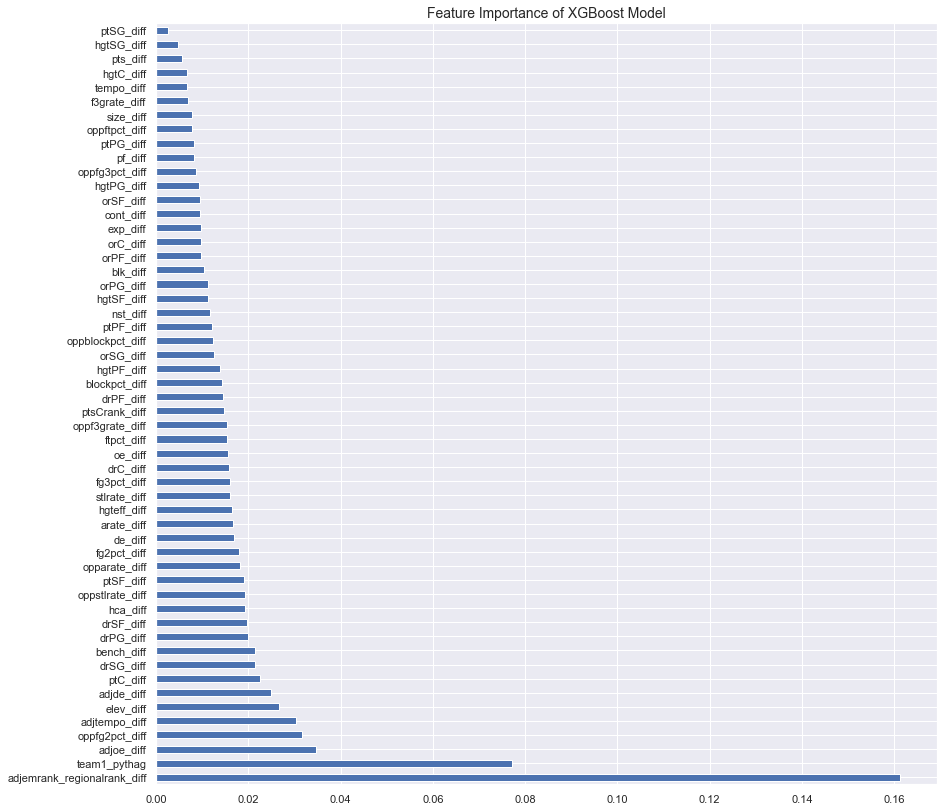

In [525]:
feat_importances.nlargest(54).plot(kind='barh')
sns.set(rc = {'figure.figsize':(14,14)})
plt.title("Feature Importance of XGBoost Model", size = 14)

In [468]:
(optimal_params, x, y, display_labels = ['Team 1 Lost', "Team 1 Won"])

SyntaxError: invalid syntax (Temp/ipykernel_24880/2906612829.py, line 1)

In [100]:
final_df = pd.read_csv('C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/final_dataframe_2022.csv', encoding='latin-1')

In [101]:
final_df.head(2)

,fg2pct_diff,fg3pct_diff,ftpct_diff,blockpct_diff,oppfg2pct_diff,oppfg3pct_diff,oppftpct_diff,oppblockpct_diff,f3grate_diff,oppf3grate_diff,arate_diff,opparate_diff,stlrate_diff,oppstlrate_diff,tempo_diff,adjtempo_diff,oe_diff,adjoe_diff,de_diff,adjde_diff,size_diff,sizerank_diff,hgtC_diff,hgtPF_diff,hgtSF_diff,hgtSG_diff,hgtPG_diff,cont_diff,hgteff_diff,hgteffrank_diff,exp_diff,exprank_diff,bench_diff,benchrank_diff,ptC_diff,ptsCrank_diff,ptPF_diff,ptsPFrank_diff,ptSF_diff,ptsSFrank_diff,ptSG_diff,ptsSGrank_diff,ptPG_diff,ptsPGrank_diff,orC_diff,orCrank_diff,orPF_diff,orPFrank_diff,orSF_diff,orSFrank_diff,orSG_diff,orSGrank_diff,orPG_diff,orPGrank_diff,drPG_diff,drPGrank_diff,drPF_diff,drPFrank_diff,drC_diff,drCrank_diff,drSF_diff,drSFrank_diff,drSG_diff,drSGrank_diff,hca_diff,pf_diff,pts_diff,nst_diff,blk_diff,elev_diff,team1_pythag,adjemrank_regionalrank_diff,game_id
0,-0.182617,-0.381936,-3.217604,-1.434612,2.302369,-0.374311,-1.461033,0.902864,9.703992,-0.119025,3.158132,9.218773,0.029682,0.006483,-0.7777,-0.1042,-3.277,-2.256,-2.7103,-2.0163,0.78,-106,0.51,0.67,1.37,-0.85,2.16,8.0,0.59,-49,-0.08,17,6.28,-141,-2.87,95,-3.46,88,2.33,-91,-0.53,24,4.54,-141,5.20,-85,-12.67,153,10.82,-218,-0.31,10,-3.02,129,0.50,-22,0.66,-1,-5.81,101,8.08,-162,-3.40,18,-0.4,-0.4,-5.7,-0.5,0.4,-600,0.508121,-100.0,2022-1124-1246
1,-2.555575,-4.901636,-0.607700,-0.438596,0.413855,-3.684451,-2.313412,0.624016,-1.484680,-4.996217,-2.891254,2.423403,0.059240,0.009419,1.9756,1.4208,-8.076,-4.109,-9.3887,-7.6971,-0.83,64,-3.36,1.38,1.47,-1.92,-1.74,-40.6,-0.98,48,0.02,-6,-2.42,43,-11.03,248,4.61,-178,3.01,-117,2.26,-62,1.10,-32,-10.77,73,1.24,-19,12.48,-236,0.55,-15,-3.58,158,-2.95,136,9.70,-136,-6.28,105,2.73,-105,-3.25,13,-0.4,-0.7,-5.6,-0.7,-0.4,-200,0.630471,-96.5,2022-1124-1345


In [ ]:
final_diff

In [88]:
submission = final_df.loc[:, final_df.columns != 'game_id']
submission.shape

(2278, 72)

In [92]:
final_df[['team1_prob', 'team2_prob']] = optimal_params.predict_proba(submission)

In [93]:
final_df.to_csv("C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/mdcm_2022_final_submission.csv", index=False)

In [475]:
print(optimal_params.best_score_)
print(optimal_params.best_params_)

-0.39537989502046433
{'colsample_bytree': 0.5, 'eta': 0.0035, 'gamma': 0.44, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 8, 'objective': 'binary:logistic', 'reg_lambda': 0.55, 'subsample': 1}


# Train Logistic Regression Model

In [221]:
#Deterimne Differences Between Games Where Team 1 Wins and Loses
diff_df = train.groupby('team1_win').mean()
diff_df

,team1_id,team1_score,team2_id,team2_score,num_ot,team1_seed,team2_seed,strongseed,weakseed,season_x,host_lat,host_long,team1_lat,team1_long,team2_lat,team2_long,team1_pt_school_ncaa,team1_pt_overall_ncaa,team1_pt_school_s16,team1_pt_overall_s16,team1_pt_school_ff,team1_pt_overall_ff,team1_pt_career_school_wins,team1_pt_career_school_losses,team1_pt_career_overall_wins,team1_pt_career_overall_losses,team1_pt_team_season_wins,team1_pt_team_season_losses,team1_pt_coach_season_wins,team1_pt_coach_season_losses,team2_pt_school_ncaa,team2_pt_overall_ncaa,team2_pt_school_s16,team2_pt_overall_s16,team2_pt_school_ff,team2_pt_overall_ff,team2_pt_career_school_wins,team2_pt_career_school_losses,team2_pt_career_overall_wins,team2_pt_career_overall_losses,team2_pt_team_season_wins,team2_pt_team_season_losses,team2_pt_coach_season_wins,team2_pt_coach_season_losses,team1_ap_final,team1_ap_preseason,team1_coaches_before_final,team1_coaches_preseason,team2_ap_final,team2_ap_preseason,team2_coaches_before_final,team2_coaches_preseason,team1_fg2pct,team1_fg3pct,team1_ftpct,team1_blockpct,team1_oppfg2pct,team1_oppfg3pct,team1_oppftpct,team1_oppblockpct,team1_f3grate,team1_oppf3grate,team1_arate,team1_opparate,team1_stlrate,team1_oppstlrate,team2_fg2pct,team2_fg3pct,team2_ftpct,team2_blockpct,team2_oppfg2pct,team2_oppfg3pct,team2_oppftpct,team2_oppblockpct,team2_f3grate,team2_oppf3grate,team2_arate,team2_opparate,team2_stlrate,team2_oppstlrate,team1_tempo,team1_adjtempo,team1_oe,team1_adjoe,team1_de,team1_adjde,team2_tempo,team2_adjtempo,team2_oe,team2_adjoe,team2_de,team2_adjde,score_diff,seed_diff,team1_continuity,season_y,team2_continuity,season_x,season_team1,size_team1,sizerank_team1,hgtC_team1,hgtCrank_team1,hgtPF_team1,hgtPFrank_team1,hgtSF_team1,hgtSFrank_team1,hgtSG_team1,hgtSGrank_team1,hgtPG_team1,hgtPGrank_team1,hgteff_team1,hgteffrank_team1,exp_team1,exprank_team1,bench_team1,benchrank_team1,ptC_team1,ptsCrank_team1,ptPF_team1,ptsPFrank_team1,ptSF_team1,ptsSFrank_team1,ptSG_team1,ptsSGrank_team1,ptPG_team1,ptsPGrank_team1,orC_team1,orCrank_team1,orPF_team1,orPFrank_team1,orSF_team1,orSFrank_team1,orSG_team1,orSGrank_team1,orPG_team1,orPGrank_team1,drC_team1,drCrank_team1,drPF_team1,drPFrank_team1,drSF_team1,drSFrank_team1,drSG_team1,drSGrank_team1,drPG_team1,drPGrank_team1,season_team2,size_team2,sizerank_team2,hgtC_team2,hgtCrank_team2,hgtPF_team2,hgtPFrank_team2,hgtSF_team2,hgtSFrank_team2,hgtSG_team2,hgtSGrank_team2,hgtPG_team2,hgtPGrank_team2,hgteff_team2,hgteffrank_team2,exp_team2,exprank_team2,bench_team2,benchrank_team2,ptC_team2,ptsCrank_team2,ptPF_team2,ptsPFrank_team2,ptSF_team2,ptsSFrank_team2,ptSG_team2,ptsSGrank_team2,ptPG_team2,ptsPGrank_team2,orC_team2,orCrank_team2,orPF_team2,orPFrank_team2,orSF_team2,orSFrank_team2,orSG_team2,orSGrank_team2,orPG_team2,orPGrank_team2,drC_team2,drCrank_team2,drPF_team2,drPFrank_team2,drSF_team2,drSFrank_team2,drSG_team2,drSGrank_team2,drPG_team2,drPGrank_team2,fg2pct_diff,fg3pct_diff,ftpct_diff,blockpct_diff,oppfg2pct_diff,oppfg3pct_diff,oppftpct_diff,oppblockpct_diff,f3grate_diff,oppf3grate_diff,arate_diff,opparate_diff,stlrate_diff,oppstlrate_diff,tempo_diff,adjtempo_diff,oe_diff,adjoe_diff,de_diff,adjde_diff,size_diff,sizerank_diff,hgtC_diff,hgtPF_diff,hgtSF_diff,hgtSG_diff,hgtPG_diff,cont_diff,hgteff_diff,hgteffrank_diff,exp_diff,exprank_diff,bench_diff,benchrank_diff,ptC_diff,ptsCrank_diff,ptPF_diff,ptsPFrank_diff,ptSF_diff,ptsSFrank_diff,ptSG_diff,ptsSGrank_diff,ptPG_diff,ptsPGrank_diff,orC_diff,orCrank_diff,orPF_diff,orPFrank_diff,orSF_diff,orSFrank_diff,orSG_diff,orSGrank_diff,orPG_diff,orPGrank_diff,drPG_diff,drPGrank_diff,drPF_diff,drPFrank_diff,drC_diff,drCrank_diff,drSF_diff,drSFrank_diff,drSG_diff,drSGrank_diff,exp_win1,exp_win2,team1_pythag,hca_team1,pf_team1,pts_team1,nst_team1,blk_team1,elev_team1,hca_team2,pf_team2,pts_team2,nst_team2,blk_team2,elev_team2,hca_diff,pf_diff,pts_diff,nst_diff,blk_diff,elev_diff,season_y,adjem_team1,adjem_rank_team1,region_seed_team1,seaso

In [100]:
#dummy_differences = dif.groupby('team1_win').mean()
diff_df.to_csv('C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/dummy_differences.csv', index=False)

NameError: name 'diff_df' is not defined

In [104]:
#Export In Order To Use In Data Viz
diff_df.to_csv("C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/df_differentials.csv", index=False)

In [42]:
#Create A Logisitc Regression Model Using Seed Differential
logit = LogisticRegression()
logit.fit(X = train[['team1_pythag', 'bench_diff', 'tempo_diff', 'exp_diff']], y=train['team1_win'])

LogisticRegression()

In [43]:
#Fit The Logistic Regression Model On Team1 Pythagorean Win% and Look At Stats
#seed_smlogit = smf.logit("team1_win ~ team1_pythag", train).fit() 
#seed_smlogit.summary()

In [44]:
#Predict The Probability and Actual Prediction For Each Game
test['prob'] = logit.predict_proba(test[['team1_pythag', 'bench_diff', 'tempo_diff', 'exp_diff']])[:,1] 
test['prediction'] = logit.predict(test[['team1_pythag', 'bench_diff', 'tempo_diff', 'exp_diff']])

In [45]:
#Check Results, Looking At Predictors, Outcome, Probability, and Prediction
test[['game_id','seed_diff','team1_win','prob','prediction']].head()

,game_id,seed_diff,team1_win,prob,prediction
0,2014-1411-1142,0,0,0.328809,0
1,2015-1461-1320,7,0,0.184934,0
2,2011-1139-1433,-3,1,0.665500,1
3,2012-1378-1396,7,1,0.430107,0
4,2007-1277-1266,1,1,0.580801,1


# Data Integrity Checks On Regression Model

In [46]:
#How Often Do We Predict Team 1 To Win?
test.groupby('team1_win')['prob'].mean()

team1_win
0    0.402058
1    0.615173
Name: prob, dtype: float64

KeyError: 'prob'

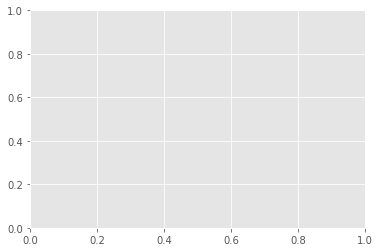

In [88]:
# Display Scatter Plot of Projected Probability (Seed Diff) vs. Projected Probability (Pythagorean)
test.plot(kind='scatter', x='prob',y='seed_diff')

In [48]:
#Create Confusion Matrix To See True Pos., False Neg., True Pos., and False Pos.
confusion_matrix(test['team1_win'], test['prediction'])

array([[94, 50],
       [39, 95]], dtype=int64)

# Metrics On Model Accuracy

In [49]:
#Accuracy Score
accuracy_score(test['team1_win'], test['prediction'],)

0.6798561151079137

In [50]:
#Precision Score
precision_score(test['team1_win'], test['prediction'])

0.6551724137931034

In [51]:
#Recall Score
recall_score(test['team1_win'], test['prediction'])

0.7089552238805971

In [52]:
#F1 Score
f1_score(test['team1_win'], test['prediction'])

0.6810035842293908

In [123]:
#Log Loss (MOST IMPORTANT, LOWER IS BETTER)
log_loss(test['team1_win'].values, test['prob'].values, labels=[0,1])

KeyError: 'prob'

We Trained This Model Based On: 

- Seed Differentials 

- Pythagorean Win% (Based On Adj Off. & Adj Def. Efficiency)

# Data Visualizations On Training Data

In [244]:
correlation_p1 = train[['team1_pythag', 'fg2pct_diff', 'fg3pct_diff', 'ftpct_diff', 'blockpct_diff',
                  'oppfg2pct_diff', 'oppfg3pct_diff', 'oppblockpct_diff', 'oppftpct_diff', 'f3grate_diff', 
                   'oppf3grate_diff', 'arate_diff', 'opparate_diff', 'stlrate_diff', 'oppstlrate_diff', 
                   'tempo_diff', 'adjtempo_diff', 'oe_diff', 'adjoe_diff', 'de_diff', 'adjde_diff', 'seed_diff']].corr()

correlation_p1.to_csv('C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/correlation_matrix_p1.csv')

In [240]:
correlation_p1 = correlation_p1.rename(columns={"team1_pythag": "team1_log5"})
correlation_p1 = correlation_p1.head(2)
#correlation_p1.head(2)

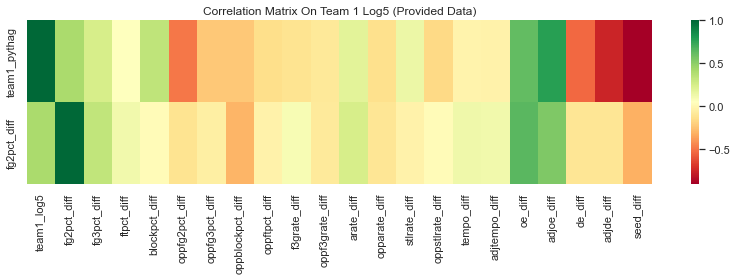

In [135]:
#Deterimne Differences Between Games Where Team 1 Wins and Loses
diff_df = train.groupby('team1_win').mean()
diff_df

,fg2pct_diff,fg3pct_diff,ftpct_diff,blockpct_diff,oppfg2pct_diff,oppfg3pct_diff,oppftpct_diff,oppblockpct_diff,f3grate_diff,oppf3grate_diff,arate_diff,opparate_diff,stlrate_diff,oppstlrate_diff,tempo_diff,adjtempo_diff,oe_diff,adjoe_diff,de_diff,adjde_diff,size_diff,sizerank_diff,hgtC_diff,hgtPF_diff,hgtSF_diff,hgtSG_diff,hgtPG_diff,cont_diff,hgteff_diff,hgteffrank_diff,exp_diff,exprank_diff,bench_diff,benchrank_diff,ptC_diff,ptsCrank_diff,ptPF_diff,ptsPFrank_diff,ptSF_diff,ptsSFrank_diff,ptSG_diff,ptsSGrank_diff,ptPG_diff,ptsPGrank_diff,orC_diff,orCrank_diff,orPF_diff,orPFrank_diff,orSF_diff,orSFrank_diff,orSG_diff,orSGrank_diff,orPG_diff,orPGrank_diff,drPG_diff,drPGrank_diff,drPF_diff,drPFrank_diff,drC_diff,drCrank_diff,drSF_diff,drSFrank_diff,drSG_diff,drSGrank_diff,hca_diff,pf_diff,pts_diff,nst_diff,blk_diff,elev_diff,team1_pythag,adjemrank_regionalrank_diff
team1_win,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.788062,-0.418082,-0.418494,-0.934119,0.870574,0.624289,0.275590,0.206612,0.428646,-0.098509,-0.235341,0.486344,-0.002159,0.001190,0.159283,0.261083,-2.517491,-3.756737,1.796986,2.822110,-0.315016,27.847352,-0.334455,-0.31919,-0.235389,-0.289377,-0.329533,-0.551678,-0.592835,25.719626,0.096978,-20.990654,0.558816,-10.464174,-0.222150,6.168224,-0.055327,2.831776,0.285327,-5.682243,0.150062,-2.788162,-0.158162,1.380062,-0.467414,7.629283,-0.509159,11.221184,-0.012056,0.096573,0.439315,-12.903427,0.549502,-18.934579,0.174393,-9.380952,-0.343925,9.915888,-0.355514,11.383178,0.349720,-9.021807,0.173801,-6.252336,-0.174455,0.546417,-0.328037,0.113084,-0.039875,116.82243,0.368012,3.531153
1,0.674500,0.461638,0.168231,1.171108,-0.834902,-0.309190,-0.135892,-0.316386,-0.284589,0.136707,0.334428,0.273600,0.004952,-0.001852,-0.174743,-0.217314,2.294909,3.156339,-1.616954,-2.248717,0.290000,-26.896875,0.336156,0.20175,0.198594,0.159406,0.361750,0.544710,0.436219,-22.193750,-0.036906,4.781250,-0.560969,10.334375,-0.451906,9.368750,0.013656,-1.059375,0.004531,0.031250,0.330313,-9.943750,0.103969,-7.312500,1.028125,-19.468750,0.441969,-5.006250,-0.507531,7.893750,-0.569938,14.434375,-0.391688,10.809375,-0.208062,10.864238,0.255594,-8.559375,0.169563,-5.262500,0.120562,-4.725000,-0.337156,10.178125,0.184687,-0.440625,0.572500,-0.116563,0.095000,-43.43750,0.607513,-3.621875


In [263]:
correlation_p2 = train[['team1_pythag', 'size_diff', 'hgtC_diff', 'hgtPF_diff', 'hgtSF_diff', 'hgtSG_diff', 'hgtPG_diff', 
                   'cont_diff', 'hgteff_diff', 'exp_diff', 'bench_diff']].corr()

correlation_p2.to_csv('C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/correlation_matrix_p2.csv')

In [265]:
correlation_p2 = correlation_p2.rename(columns={"team1_pythag": "team1_log5"})
correlation_p2 = correlation_p2.head(1)

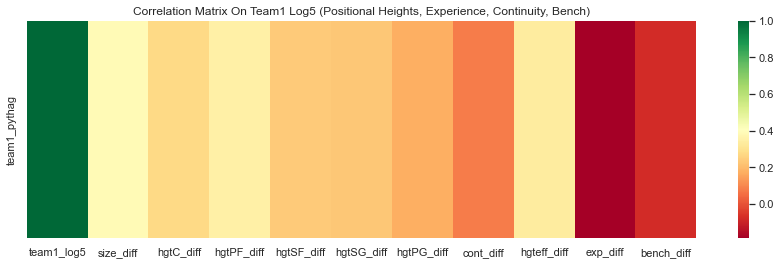

In [266]:
#Create Heatmap To Find Correlations On
fig, ax = plt.subplots()

plot = sns.heatmap(correlation_p2,fmt='.2f', cmap='RdYlGn', ax=ax).set(title = "Correlation Matrix On Team1 Log5 (Positional Heights, Experience, Continuity, Bench)")
sns.set(rc = {'figure.figsize':(15,4)})

In [253]:
correlation_p3 = train[['team1_pythag', 'ptC_diff', 'ptPF_diff', 'ptSF_diff',
                        'ptSG_diff', 'ptPG_diff', 'orC_diff', 'orPF_diff', 
                        'orSF_diff', 'orSG_diff', 'orPG_diff', 'drC_diff', 'drPF_diff', 
                        'drSF_diff', 'drSG_diff', 'drPG_diff']].corr()

correlation_p3 = correlation_p3.head(1)

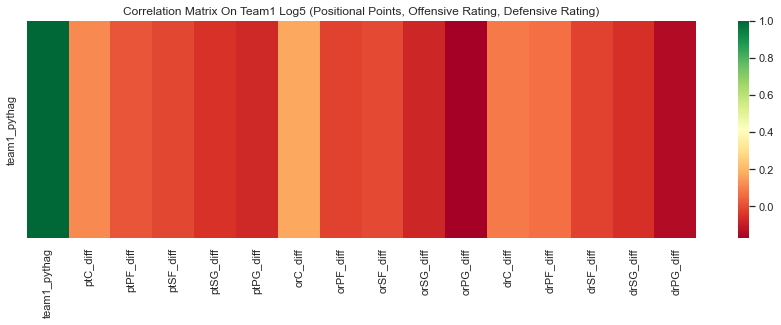

In [267]:
#Create Heatmap To Find Correlations On
fig, ax = plt.subplots()

plot = sns.heatmap(correlation_p3,fmt='.2f', cmap='RdYlGn', ax=ax).set(title = "Correlation Matrix On Team1 Log5 (Positional Points, Offensive Rating, Defensive Rating)")
sns.set(rc = {'figure.figsize':(10,3)})

In [268]:
correlation_p3.to_csv('C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/correlation_matrix_p3.csv')

In [ ]:
correlation_p4 = train[['team1_pythag', 'hca_diff', 'pf_diff', 'pts_diff', 'nst_diff', 'blk_diff', 'elev_diff', 'adjemrank_regionalrank_diff']].corr()

correlation_p4 = correlation_p4.head(1)

In [274]:
correlation_p4.to_csv('C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/correlation_matrix_p4.csv')

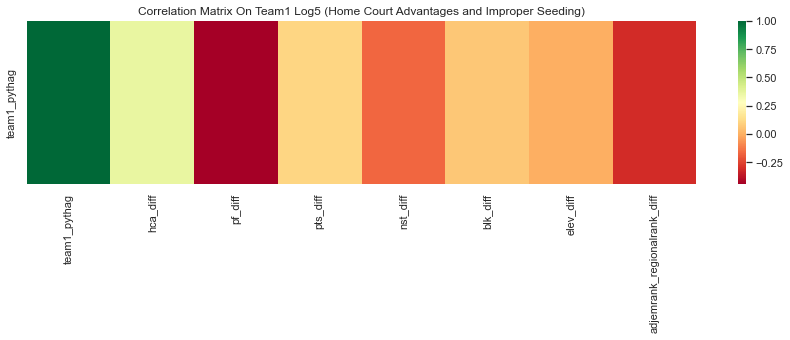

In [273]:
#Create Heatmap To Find Correlations On
fig, ax = plt.subplots()

plot = sns.heatmap(correlation_p4,fmt='.2f', cmap='RdYlGn', ax=ax).set(title = "Correlation Matrix On Team1 Log5 (Home Court Advantages and Improper Seeding)")
sns.set(rc = {'figure.figsize':(15,4)})

# Example Data - First Submission

In [109]:
ex = pd.read_csv('C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/NCAA_Tourney_2002_2021.csv').query("season==2019").reset_index(drop=True)

In [110]:
ex.shape

(67, 106)

In [111]:
test['seed_diff'] = test['team1_seed'] - test['team2_seed']
test['exp_win1'] = (test['team1_adjoe']**11.5)/ ((test['team1_adjde']**11.5)+(test['team1_adjoe']**11.5))
test['exp_win2'] = (test['team2_adjoe']**11.5)/ ((ex['team2_adjde']**11.5)+(ex['team2_adjoe']**11.5))
test['team1_pythag'] = (ex['exp_win1'] - (ex['exp_win1']*ex['exp_win2']))/(ex['exp_win1']+ex['exp_win2']-(2*ex['exp_win1']*ex['exp_win2']))

In [245]:
test['prob'] = logit.predict_proba(test[['seed_diff', 'pythag']])[:,1]

C:\Users\Peter Majors\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- size_diff

  warnings.warn(message, FutureWarning)


ValueError: X has 2 features, but LogisticRegression is expecting 3 features as input.

In [113]:
ex[['game_id','prob']].head()

,game_id,prob
0,2019-1192-1341,0.518421
1,2019-1125-1396,0.573742
2,2019-1295-1300,0.668649
3,2019-1113-1385,0.562898
4,2019-1278-1257,0.331227


In [114]:
ex = ex[['game_id','prob']]

In [115]:
ex['prob'].mean()

0.6665594244173787

In [116]:
ex.to_csv("C:/Users/Peter Majors/OneDrive/Documents/MDCM 2022 Research/mdcm_2022_first_submission.csv", index=False)

# Importing Data On AdjEM vs Seed